**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import modplot
import os
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import stats

**Get the Relevant Data**

In [3]:
base_dir = 'C:\\Users\\vega0\\Documents\\Academics\\MIT Course Materials\\Course 8 Physics\\8.13 Experimental Physics 1\\Fall 2021\\Experiment Sequences\\21cm Radio Astrophysics'

dir_data = base_dir + '\\Data\\11-18-2021'
dir_plot= base_dir + '\\Paper and Presentation'

In [4]:
os.chdir(dir_data)

In [27]:
# get iliachtida 1 and 2
f1 = open('illiachtida1.rad', 'r')
f2 = open('illiachtida2.rad', 'r')

lines1 = list(f1.readlines())
lines2 = list(f2.readlines())

get the longitudes, spectra, vlsr

In [28]:
# illiachtida 1
longs1 = [20, 30, 40, 50, 60, 70, 80, 90]
spectra1 = []
vlsrs1 = []

for line in lines1[11:61][::7]:
    text = line.split()
    
    # get the temperature readings
    freqs = text[text.index('148') + 1:text.index('vlsr')]
    nums = [float(freq) for freq in freqs]
    spectra1.append(nums)
    
    # get the vlsr
    vlsrs1.append(float(text[text.index('vlsr')+1]))

In [29]:
# illiachtida 2
longs2 = [110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
spectra2 = []
vlsrs2 = []

for line in lines2[11:75][::7]:
    text = line.split()
    
    # get the temperature readings
    freqs = text[text.index('148') + 1:text.index('vlsr')]
    nums = [float(freq) for freq in freqs]
    spectra2.append(nums)
    
    # get the vlsr
    vlsrs2.append(float(text[text.index('vlsr')+1]))

**Plot the Spectra as Functions of Frequency**

In [32]:
# plot parameters
save = False
mpl.rcParams['figure.dpi'] = 300
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif')

In [33]:
# set up the frequency bins
bins = [1419.84 + i*0.00781250 for i in range(148)]

Plot the Spectra for G20-G90 and do linear fits

In [145]:
# linear function to fit to
def linear_func(a, b, x):
    return a*x + b

In [150]:
# fit function
def linfit(bins, freqs, errs, a, b):
    popt, pcov = curve_fit(linear_func, bins, freqs, sigma=errs, p0 = [a, b],
                       absolute_sigma = True)
    return popt, pcov

In [403]:
# chisq function
def chisq(func,popt,x,y,sig):
    expected_vals = func(x, *popt) # Again, better off using *popt
    return np.sum((y-expected_vals)**2/sig**2)

In [151]:
# get rid of outliers
mask = (np.array(spectra1[0])>150)
spec20 = np.array(spectra1[0])[mask]
bins20 = np.array(bins)[mask]

In [152]:
# fit G20
popt20, pcov20 = linfit(bins20, spec20, np.sqrt(spec20/20), a=0.5, b=195)

In [405]:
# chisq20
chi20 = chisq(linear_func, popt20, bins20, spec20, np.sqrt(spec20/20))

In [406]:
chi20

28.235598507461404

In [561]:
# fit params and errors
b20 = popt20[0]
a20 = popt20[1]
b20err, a20err = np.sqrt(np.diag(pcov20))

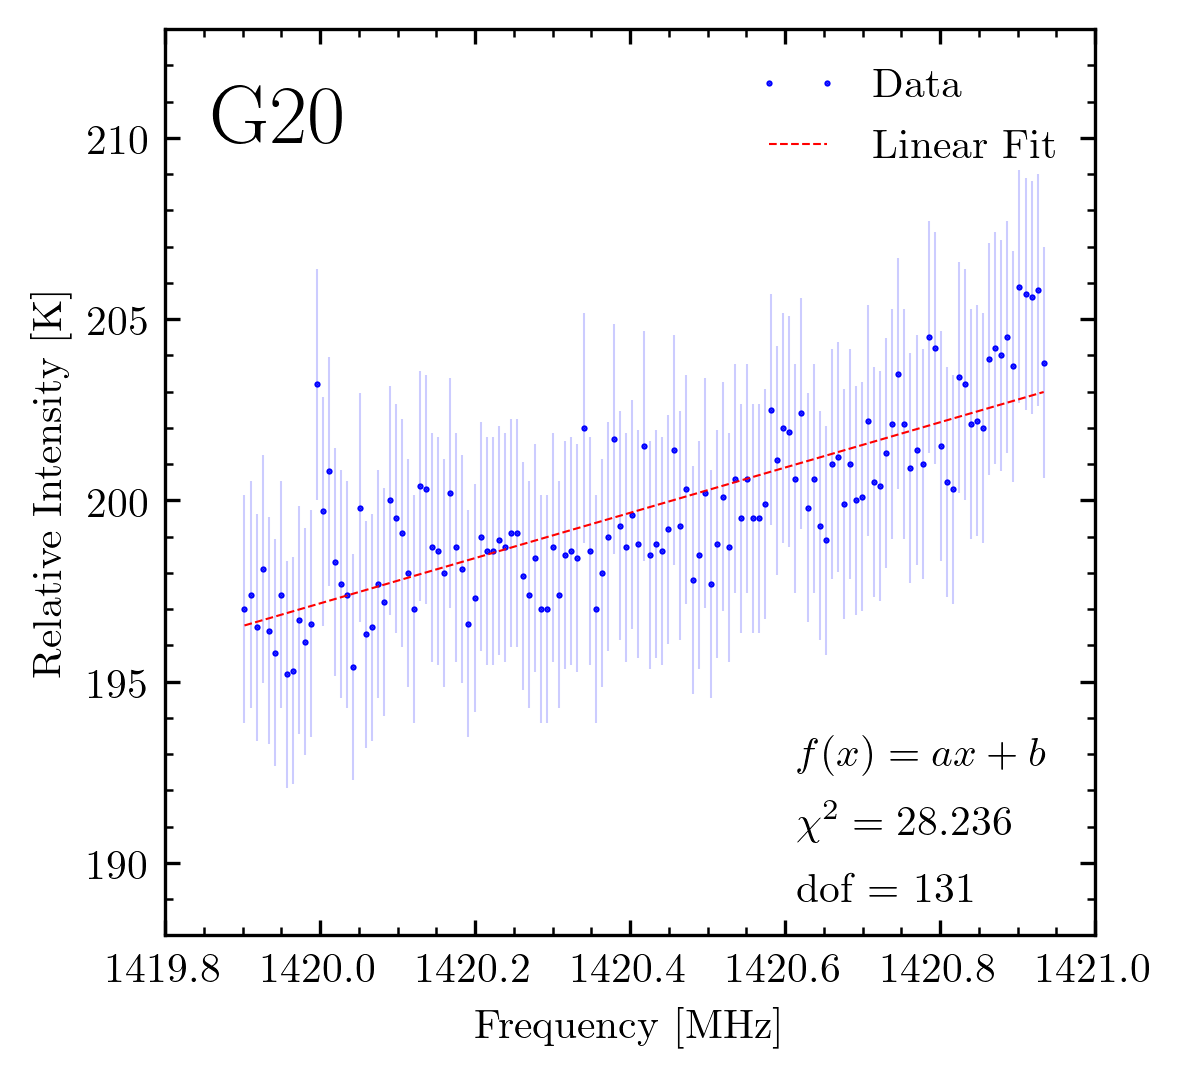

In [590]:
# G20
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(188,213), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins20, spec20, yerr=np.sqrt(spec20/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins20, spec20, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins20[0],bins20[-1], 100)
ax.plot(x, linear_func(x, *popt20), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G20')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=28.236$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec_linfit_20.png')

In [82]:
# get rid of outliers
mask = (np.array(spectra1[1])>140)
spec30 = np.array(spectra1[1])[mask]
bins30 = np.array(bins)[mask]

In [162]:
# fit G30
popt30, pcov30 = linfit(bins30, spec30, np.sqrt(spec30/20), a=0.5, b=150)

In [449]:
# chisq30
chi30 = chisq(linear_func, popt30, bins30, spec30, np.sqrt(spec30/20))

In [450]:
chi30

26.030991024110758

In [564]:
# fit params and errors
b30 = popt30[0]
a30 = popt30[1]
b30err, a30err = np.sqrt(np.diag(pcov30))

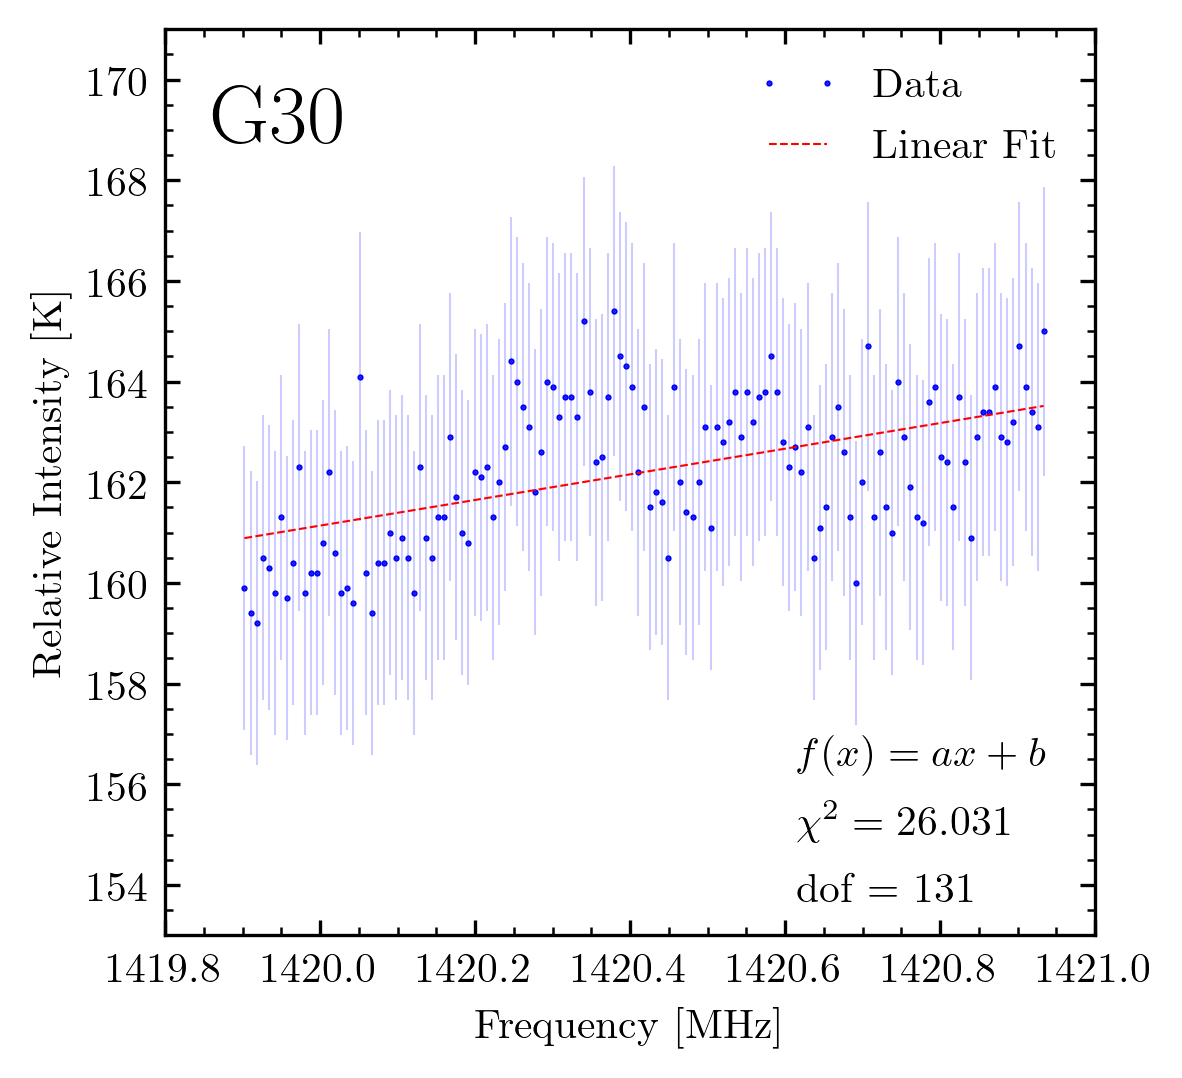

In [591]:
#G30
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(153,171), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins30, spec30, yerr=np.sqrt(spec30/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins30, spec30, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins30[0],bins30[-1], 100)
ax.plot(x, linear_func(x, *popt30), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90,textops_update={'fontsize':20}, 
             line_0 = 'G30')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=26.031$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec_linfit_30.png')

In [89]:
# get rid of outliers
mask = (np.array(spectra1[2])>140)
spec40 = np.array(spectra1[2])[mask]
bins40 = np.array(bins)[mask]

In [164]:
# fit G40
popt40, pcov40 = linfit(bins40, spec40, np.sqrt(spec40/20), a=0.5, b=150)

In [451]:
# chisq40
chi40 = chisq(linear_func, popt40, bins40, spec40, np.sqrt(spec40/20))

In [452]:
chi40

43.822336437336155

In [565]:
# fit params and errors
b40 = popt40[0]
a40 = popt40[1]
b40err, a40err = np.sqrt(np.diag(pcov40))

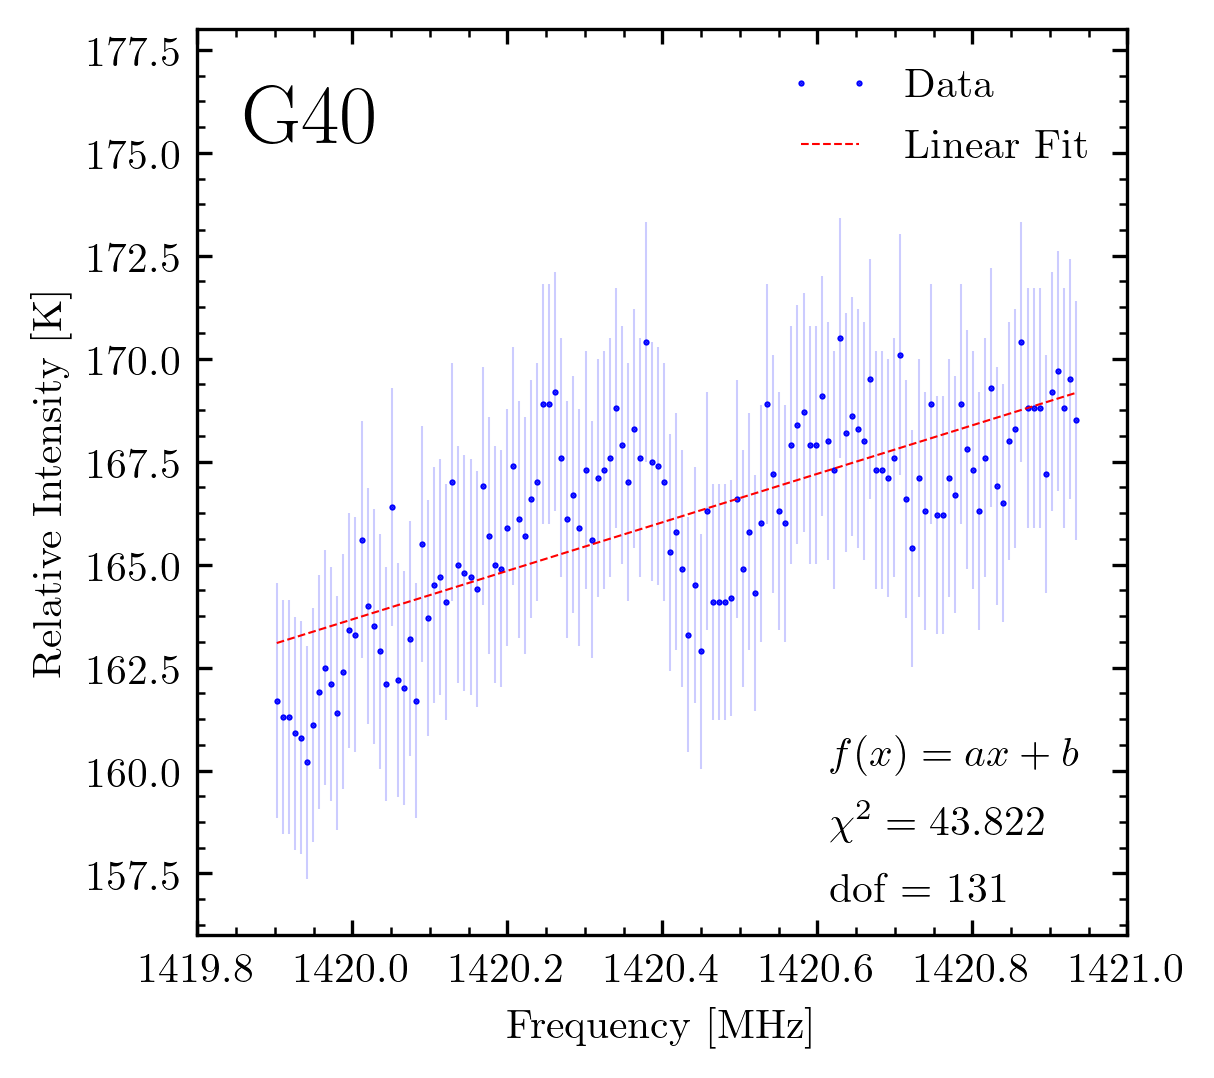

In [592]:
# G40
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(156,178), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins40, spec40, yerr=np.sqrt(spec40/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins40, spec40, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins40[0],bins40[-1], 100)
ax.plot(x, linear_func(x, *popt40), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G40')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=43.822$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec_linfit_40.png')

In [114]:
# get rid of outliers
mask = (np.array(spectra1[3])>140)
spec50 = np.array(spectra1[3])[mask]
bins50 = np.array(bins)[mask]

In [166]:
# fit G50
popt50, pcov50 = linfit(bins50, spec50, np.sqrt(spec50/20), a=0.5, b=150)

In [453]:
# chisq50
chi50 = chisq(linear_func, popt50, bins50, spec50, np.sqrt(spec50/20))

In [454]:
chi50

87.87154540259907

In [566]:
# fit params and errors
b50 = popt50[0]
a50 = popt50[1]
b50err, a50err = np.sqrt(np.diag(pcov50))

In [ ]:
modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=87.872$', 
             line_2 = 'dof = 131')

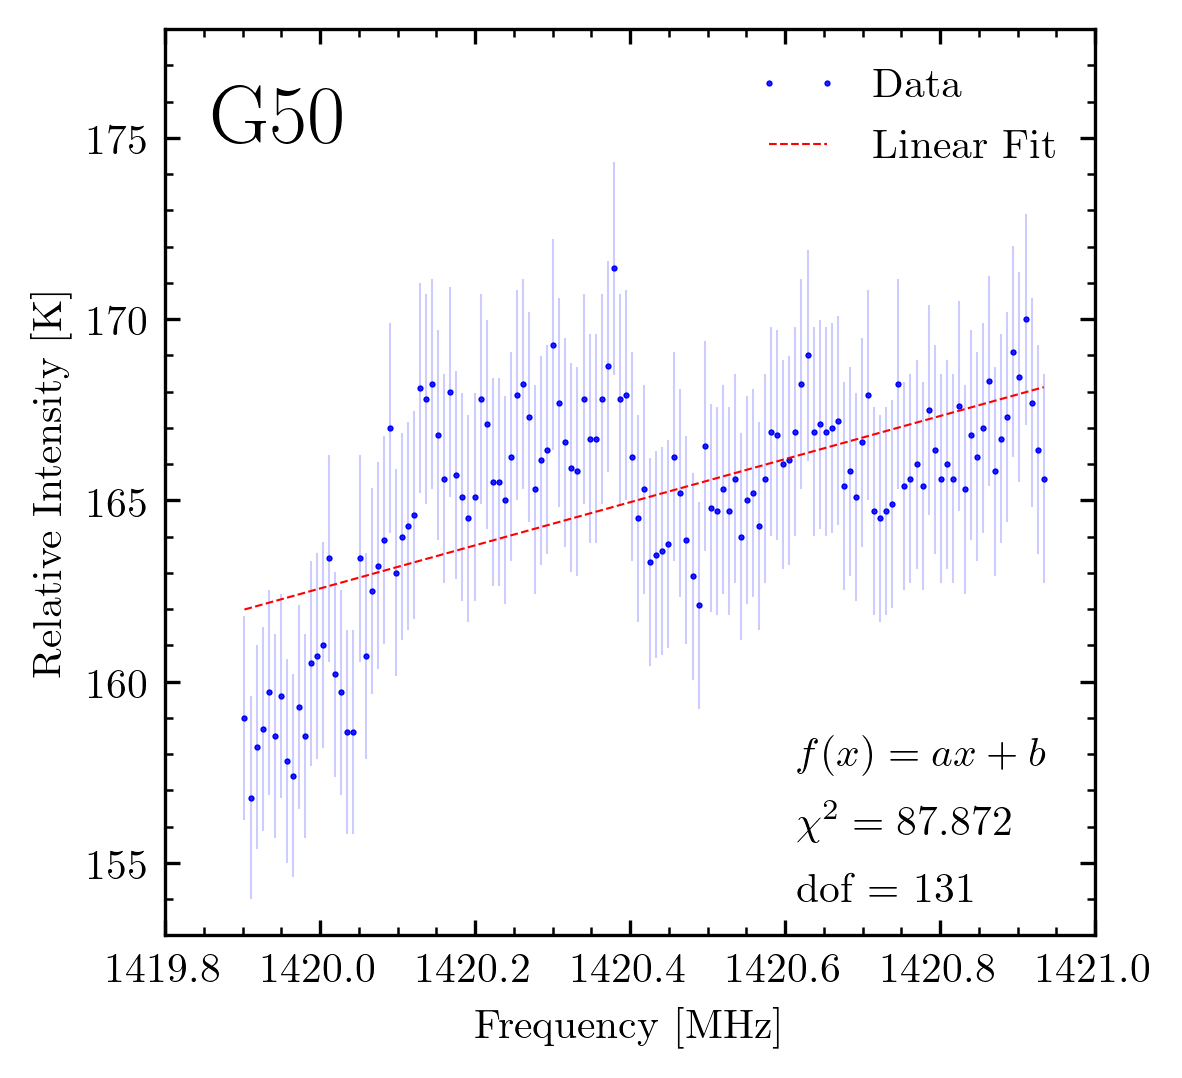

In [593]:
# G50
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(153,178), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins50, spec50, yerr=np.sqrt(spec50/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins50, spec50, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins50[0],bins50[-1], 100)
ax.plot(x, linear_func(x, *popt50), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G50')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=87.872$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec_linfit_50.png')

In [119]:
# get rid of outliers
mask = (np.array(spectra1[4])>150)
spec60 = np.array(spectra1[4])[mask]
bins60 = np.array(bins)[mask]

In [168]:
# fit G60
popt60, pcov60 = linfit(bins60, spec60, np.sqrt(spec60/20), a=0.5, b=150)

In [455]:
# chisq60
chi60 = chisq(linear_func, popt60, bins60, spec60, np.sqrt(spec60/20))

In [456]:
chi60

131.8532615198566

In [567]:
# fit params and errors
b60 = popt60[0]
a60 = popt60[1]
b60err, a60err = np.sqrt(np.diag(pcov60))

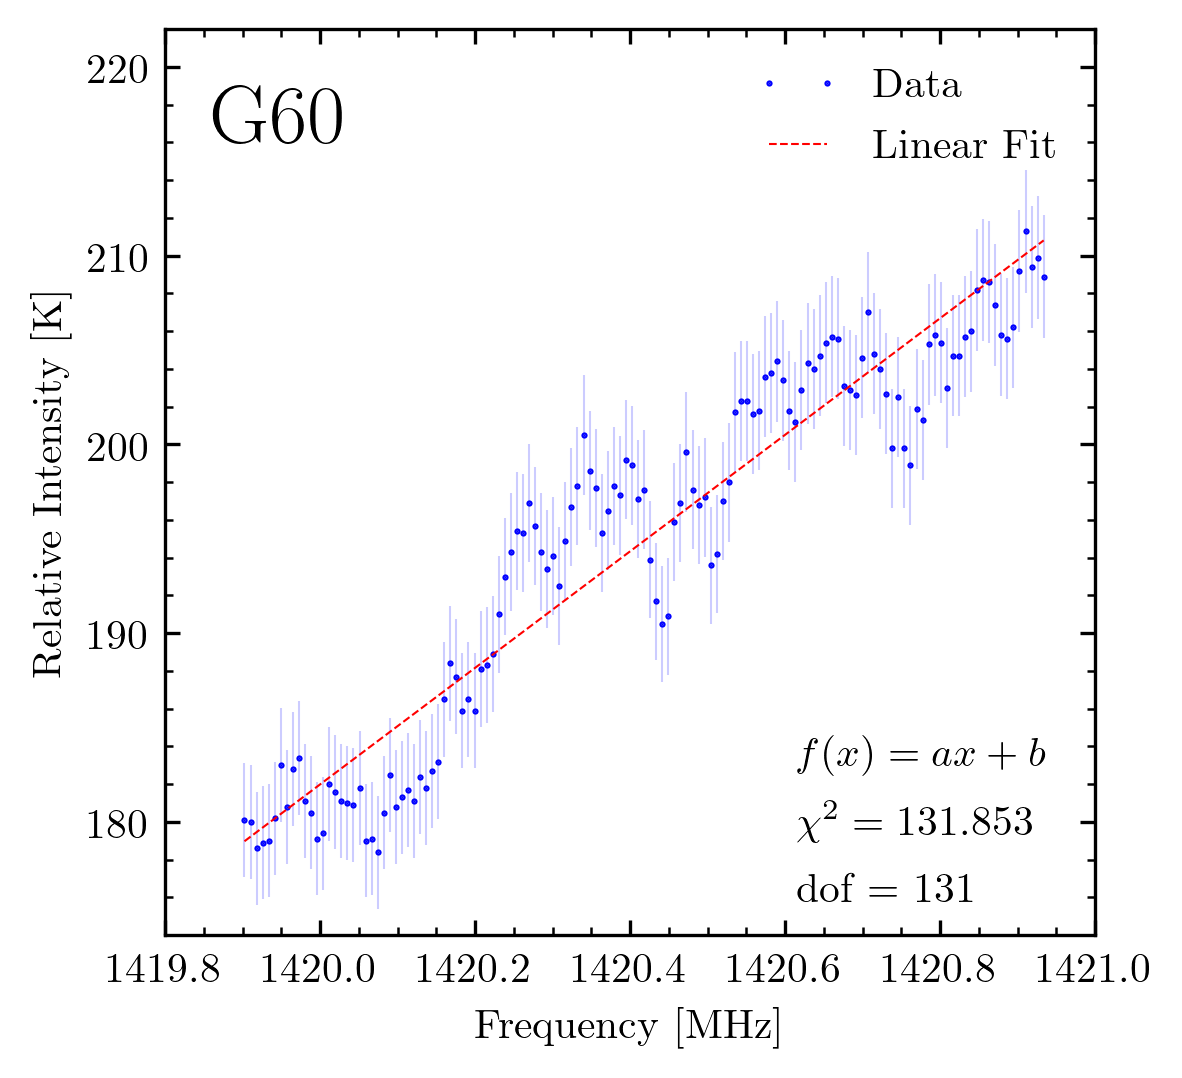

In [594]:
# G60
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(174,222), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins60, spec60, yerr=np.sqrt(spec60/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins60, spec60, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins60[0],bins60[-1], 100)
ax.plot(x, linear_func(x, *popt60), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G60')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=131.853$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec_linfit_60.png')

In [128]:
# get rid of outliers
mask = (np.array(spectra1[5])>140)
spec70 = np.array(spectra1[5])[mask]
bins70 = np.array(bins)[mask]

In [170]:
# fit G70
popt70, pcov70 = linfit(bins70, spec70, np.sqrt(spec70/20), a=0.5, b=150)

In [457]:
# chisq70
chi70 = chisq(linear_func, popt70, bins70, spec70, np.sqrt(spec70/20))

In [458]:
chi70

103.41526108743999

In [568]:
# fit params and errors
b70 = popt70[0]
a70 = popt70[1]
b70err, a70err = np.sqrt(np.diag(pcov70))

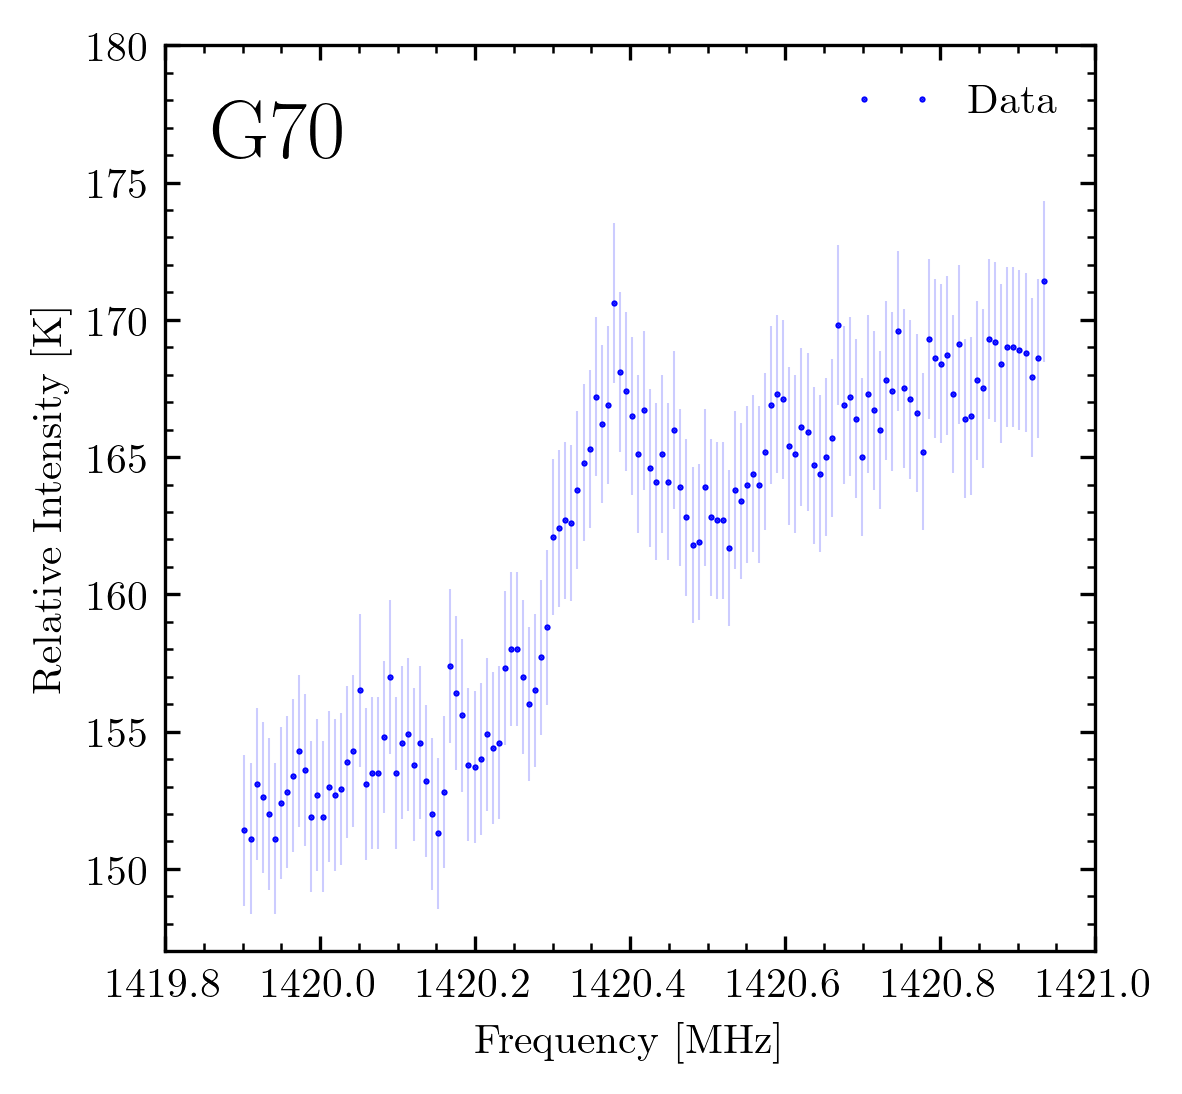

In [872]:
# raw G70 (no fit)
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(147,180), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins70, spec70, yerr=np.sqrt(spec70/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins70, spec70, ls='None', marker='o', ms=0.5, color='blue', label='Data')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G70')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec_linraw_70.png')

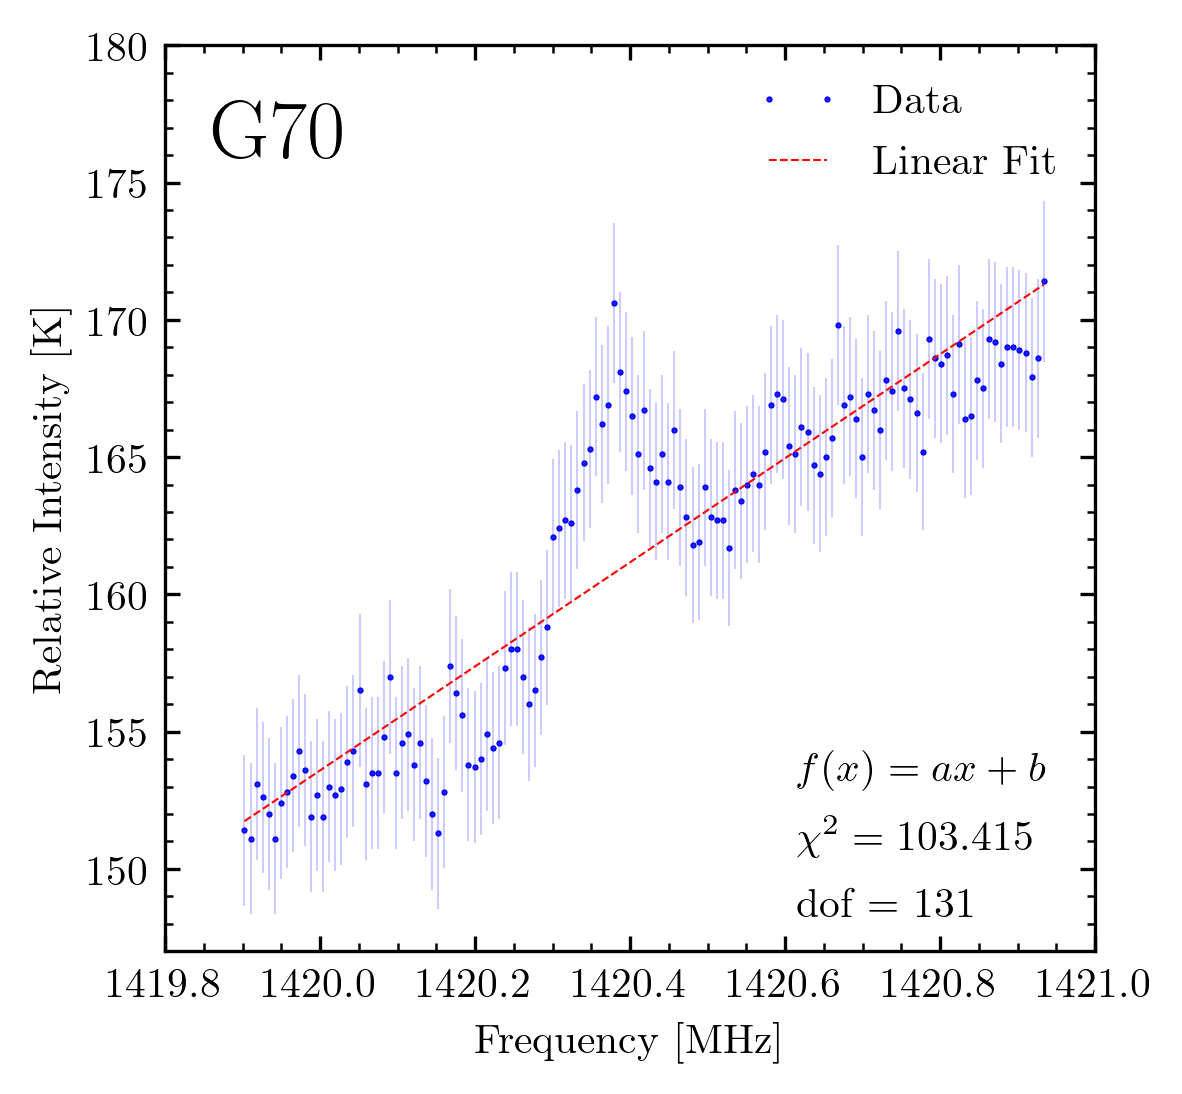

In [595]:
# G70
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(147,180), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins70, spec70, yerr=np.sqrt(spec70/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins70, spec70, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins70[0], bins70[-1], 100)
ax.plot(x, linear_func(x, *popt70), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G70')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=103.415$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec_linfit_70.png')

In [134]:
# get rid of outliers
mask = (np.array(spectra1[6])>300)
spec80 = np.array(spectra1[6])[mask]
bins80 = np.array(bins)[mask]

In [172]:
# fit G80
popt80, pcov80 = linfit(bins80, spec80, np.sqrt(spec80/20), a=0.5, b=300)

In [460]:
# chisq80
chi80 = chisq(linear_func, popt80, bins80, spec80, np.sqrt(spec80/20))

In [461]:
chi80

181.95636322030364

In [569]:
# fit params and errors
b80 = popt80[0]
a80 = popt80[1]
b80err, a80err = np.sqrt(np.diag(pcov80))

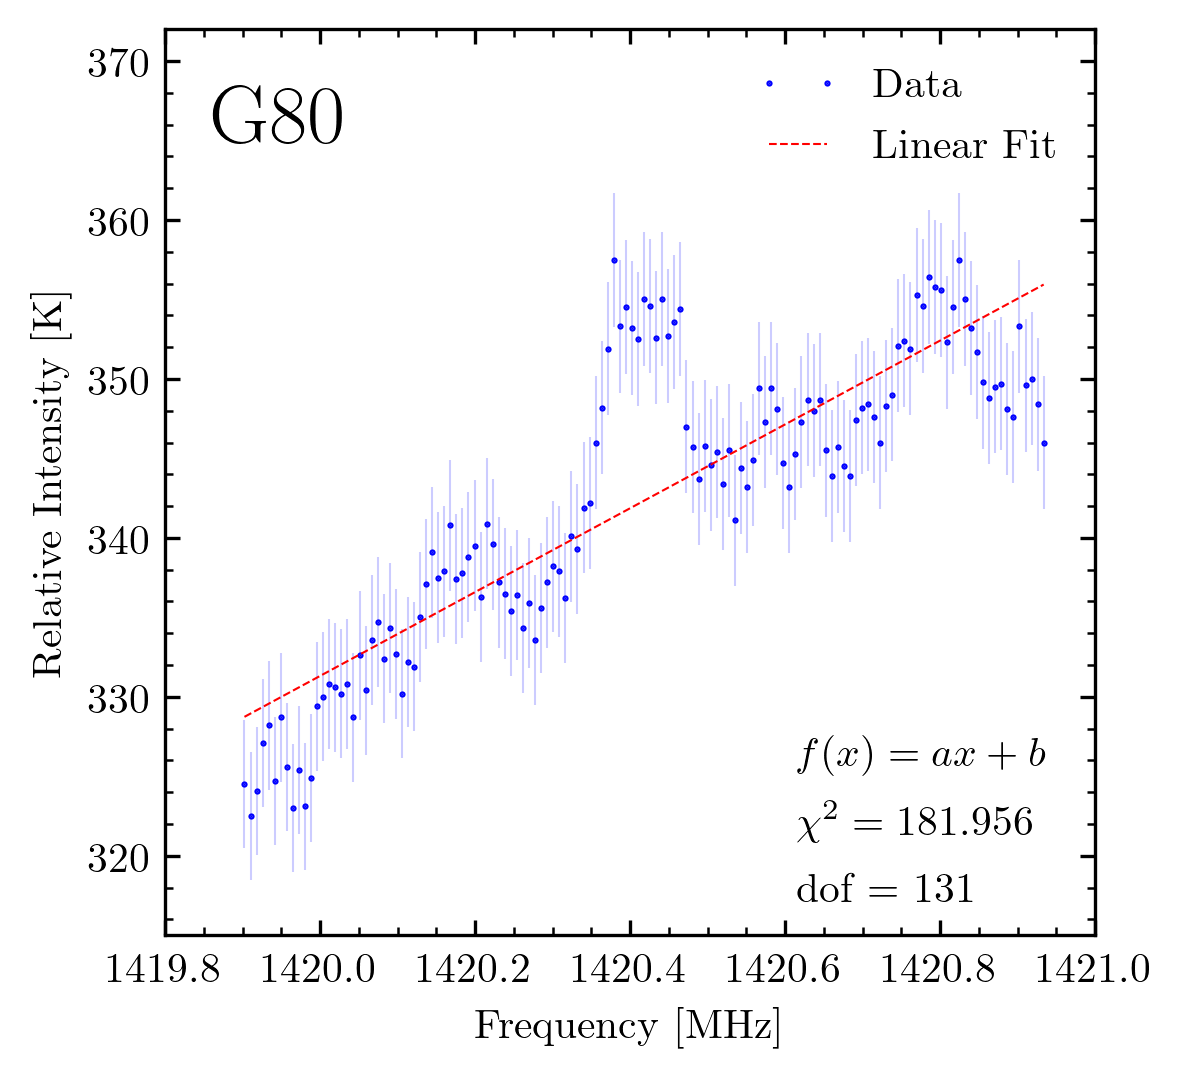

In [596]:
# G80
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(315,372), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins80, spec80, yerr=np.sqrt(spec80/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins80, spec80, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins80[0], bins80[-1], 100)
ax.plot(x, linear_func(x, *popt80), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20}, 
             line_0 = 'G80')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=181.956$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec_linfit_80.png')

In [139]:
# get rid of outliers
mask = (np.array(spectra1[7])>300)
spec90 = np.array(spectra1[7])[mask]
bins90 = np.array(bins)[mask]

In [174]:
# fit G90
popt90, pcov90 = linfit(bins90, spec90, np.sqrt(spec90/20), a=0.5, b=300)

In [462]:
# chisq90
chi90 = chisq(linear_func, popt90, bins90, spec90, np.sqrt(spec90/20))

In [463]:
chi90

180.06746639568897

In [570]:
# fit params and errors
b90 = popt90[0]
a90 = popt90[1]
b90err, a90err = np.sqrt(np.diag(pcov90))

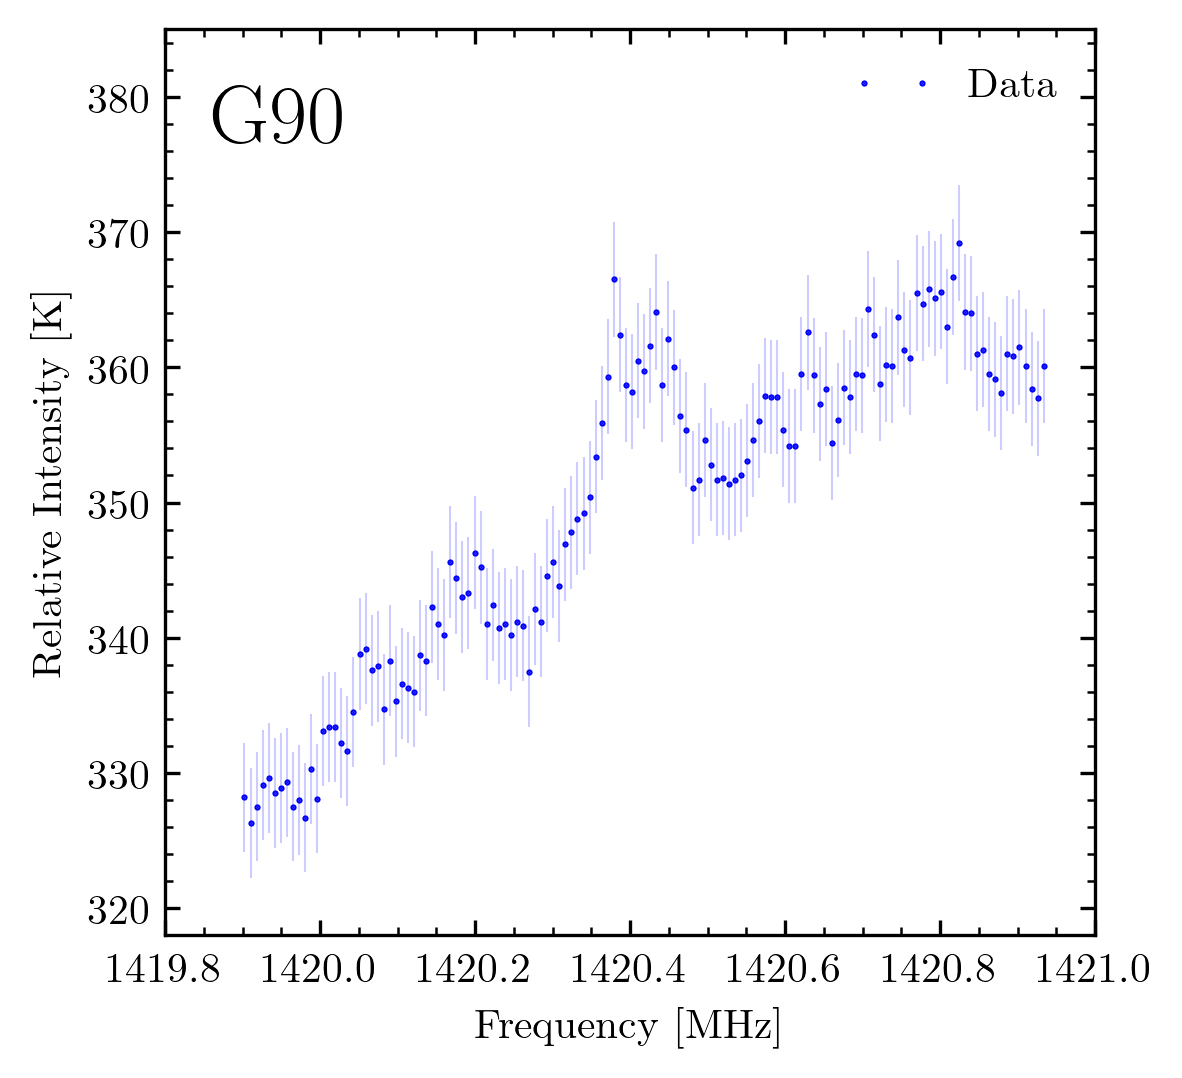

In [873]:
# raw G90 (no fit)
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(318,385), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins90, spec90, yerr=np.sqrt(spec90/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins90, spec90, ls='None', marker='o', ms=0.5, color='blue', label='Data')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G90')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec_linraw_90.png')

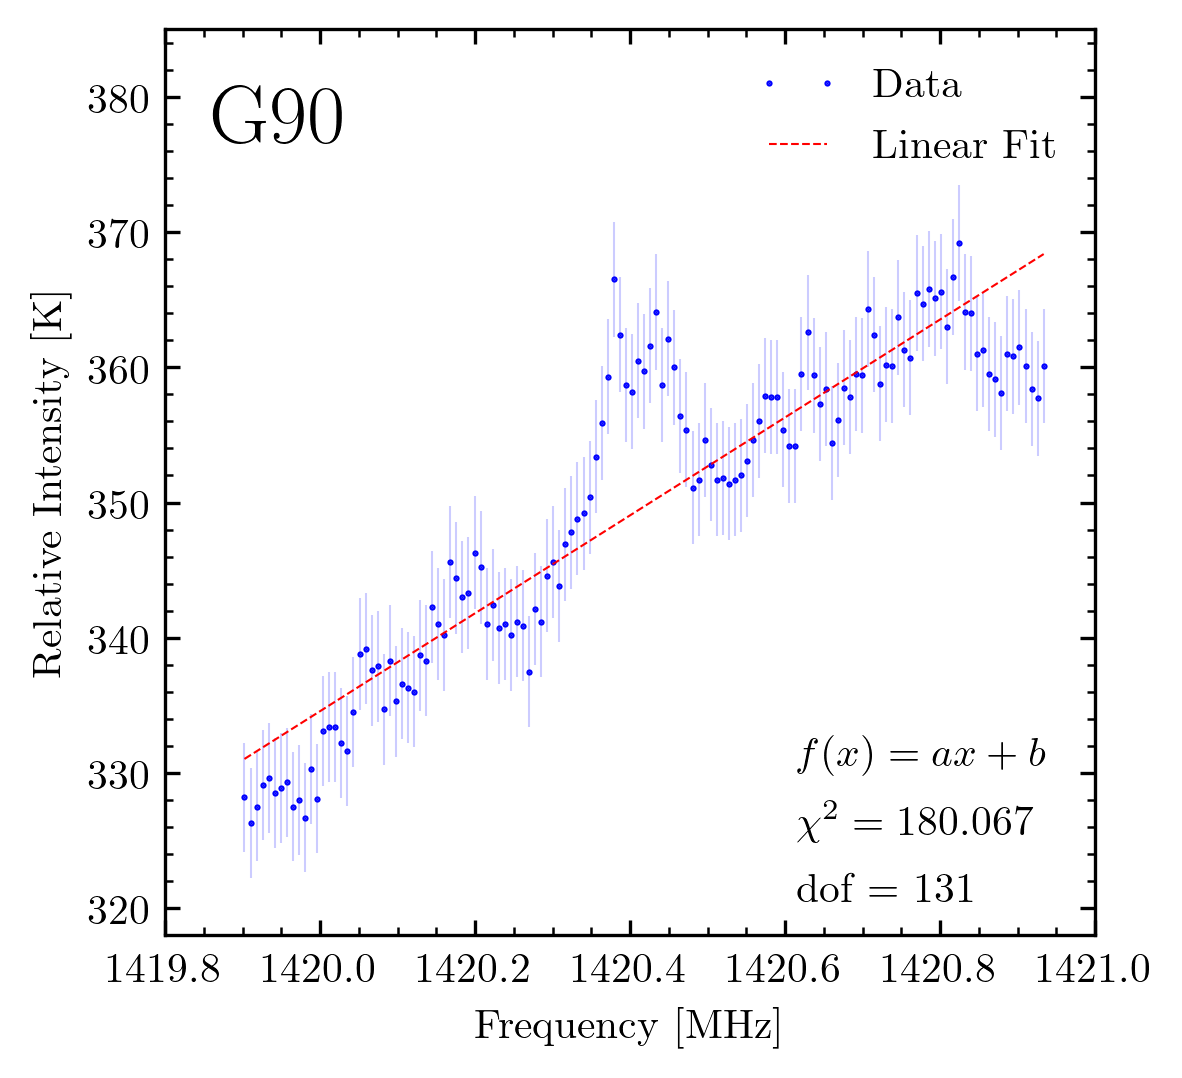

In [597]:
# G90
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(318,385), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins90, spec90, yerr=np.sqrt(spec90/20), ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='blue', alpha=0.2)
ax.plot(bins90, spec90, ls='None', marker='o', ms=0.5, color='blue', label='Data')

# plot the fit
x=np.linspace(bins90[0], bins90[-1], 100)
ax.plot(x, linear_func(x, *popt90), ls='--', color='red', lw=0.5, label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G90')

modplot.stamp(ax=ax, left_x=0.68, top_y=0.20, textops_update={'fontsize':10},
             line_0 = '$f(x)=ax+b$',
             line_1 = '$\chi^{2}=180.067$', 
             line_2 = 'dof = 131')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec_linfit_90.png')

**Subtract the Linear Background from Each Spectrum**

In [176]:
# spectra
rel_spec20 = spec20-linear_func(bins20, *popt20)
rel_spec30 = spec30-linear_func(bins30, *popt30)
rel_spec40 = spec40-linear_func(bins40, *popt40)
rel_spec50 = spec50-linear_func(bins50, *popt50)
rel_spec60 = spec60-linear_func(bins60, *popt60)
rel_spec70 = spec70-linear_func(bins70, *popt70)
rel_spec80 = spec80-linear_func(bins80, *popt80)
rel_spec90 = spec90-linear_func(bins90, *popt90)

In [187]:
# errs
errs_spec20 = np.sqrt(np.abs(spec20/20-linear_func(bins20, *popt20)/20))
errs_spec30 = np.sqrt(np.abs(spec30/20-linear_func(bins30, *popt30)/20))
errs_spec40 = np.sqrt(np.abs(spec40/20-linear_func(bins40, *popt40)/20))
errs_spec50 = np.sqrt(np.abs(spec50/20-linear_func(bins50, *popt50)/20))
errs_spec60 = np.sqrt(np.abs(spec60/20-linear_func(bins60, *popt60)/20))
errs_spec70 = np.sqrt(np.abs(spec70/20-linear_func(bins70, *popt70)/20))
errs_spec80 = np.sqrt(np.abs(spec80/20-linear_func(bins80, *popt80)/20))
errs_spec90 = np.sqrt(np.abs(spec90/20-linear_func(bins90, *popt90)/20))

Create a Fit Function of Four Gaussians and a Linear Offset

In [224]:
def gauss_func(x, a1, mu1, sig1, a2, mu2, sig2, a3, mu3, sig3, a4, mu4, sig4, b):
    gauss1 = a1*np.exp((-(x-mu1)**2)/(2*sig1**2))
    gauss2 = a2*np.exp((-(x-mu2)**2)/(2*sig2**2))
    gauss3 = a3*np.exp((-(x-mu3)**2)/(2*sig3**2))
    gauss4 = a4*np.exp((-(x-mu4)**2)/(2*sig4**2))
        
    return gauss1 + gauss2 + gauss3 + gauss4 + b

In [270]:
def gauss_fit(bins,freqs,errs, a1, mu1, sig1, a2, mu2, sig2, a3, mu3, sig3, a4, mu4, sig4, b):
    popt, pcov = curve_fit(gauss_func, bins, freqs, sigma=errs, 
                           p0=[a1, mu1, sig1, a2, mu2, sig2, a3, mu3, sig3, a4, mu4, sig4, b], 
                           absolute_sigma=True, bounds=[[0,1419,-5,0,1419,-5,0,1419,-5,
                                                        0,1419,-5,-10],[20,1421,5,20,1421,5,
                                                                       20,1421,5,20,1421,5,10]])
    return popt, pcov

**Plot the Background Subtracted Spectra with Gaussian Fits**

In [468]:
gopt20, gcov20 = gauss_fit(bins=bins20, freqs=rel_spec20, errs=errs_spec20, 
                           a1=2, mu1=1420.4, sig1=0.1, a2=6, mu2=1420.0, sig2=0.1, 
                           a3=2, mu3=1420.2, sig3=0.1, a4=3, mu4=1420.6, sig4=0.1, b=-1)

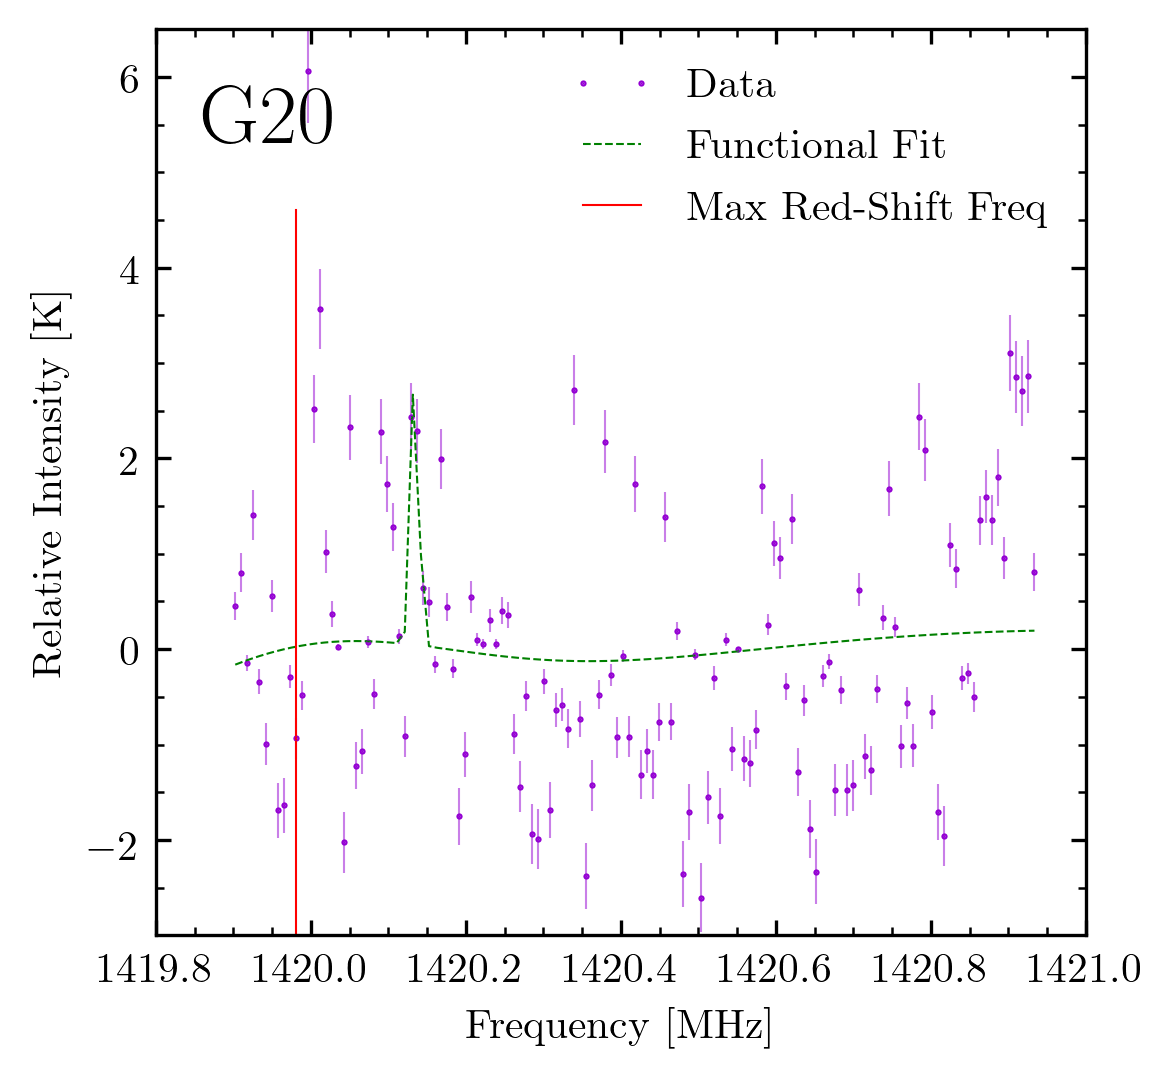

In [871]:
# G20
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-3,6.5), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins20, rel_spec20, yerr=errs_spec20, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins20, rel_spec20, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# plot the fit
x=np.linspace(bins20[0], bins20[-1], 100)
ax.plot(x, gauss_func(x, *gopt20), ls='--', lw=0.5, color='green', label='Functional Fit')

# the max redshifted frequency
ax.axvline(fred20, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G20')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec20_gauss_fit.png')

In [478]:
gopt30, gcov30 = gauss_fit(bins=bins40, freqs=rel_spec40, errs=errs_spec40, 
                           a1=5, mu1=1420.4, sig1=0.2, a2=2.5, mu2=1420.0, sig2=0.1, 
                           a3=3, mu3=1420.3, sig3=0.1, a4=1.5, mu4=1420.5, sig4=0.1, b=-1.5)

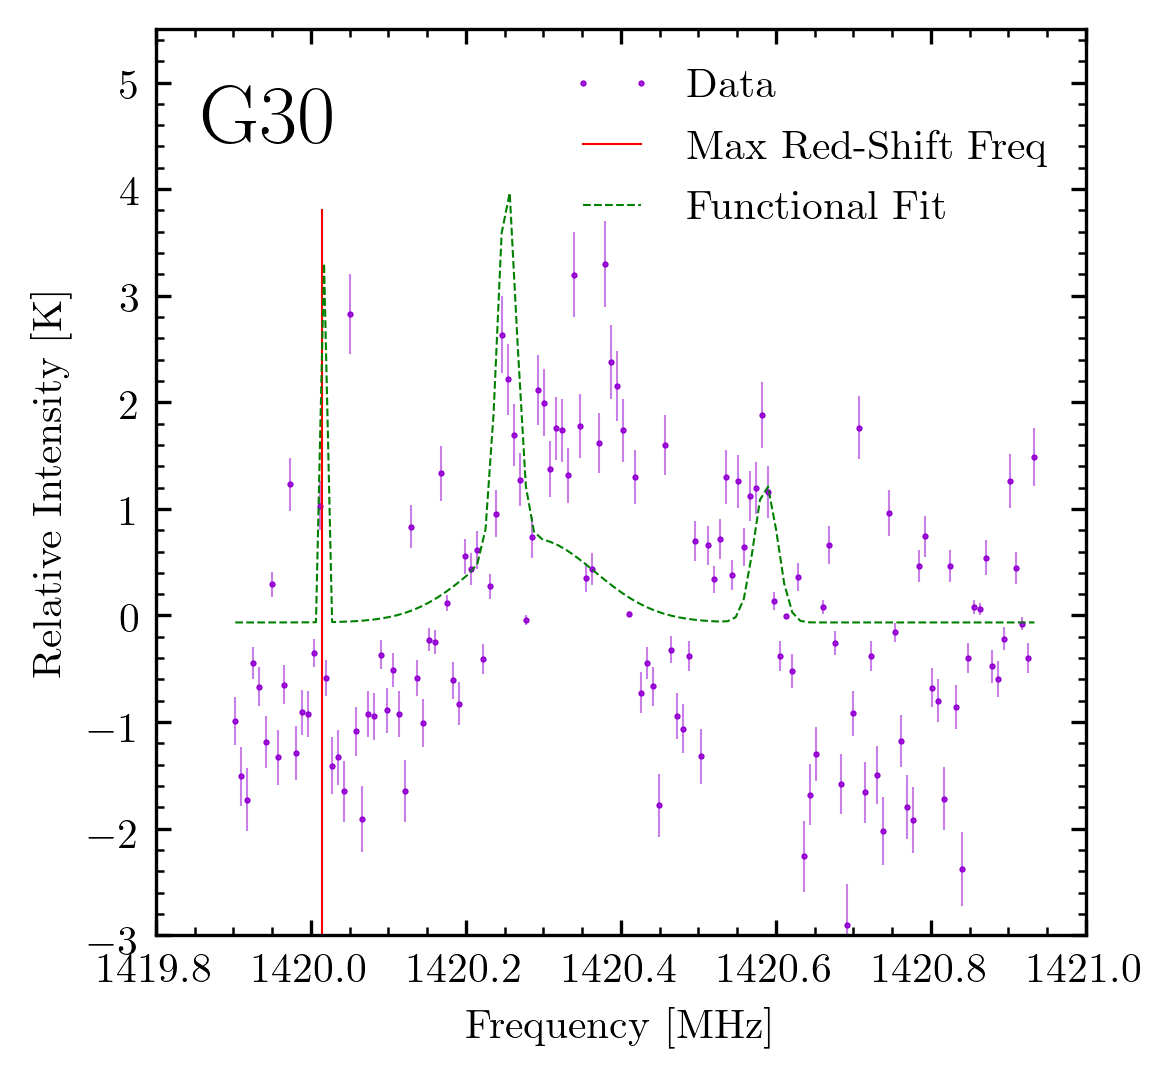

In [870]:
# G30
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-3,5.5), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins30, rel_spec30, yerr=errs_spec30, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins30, rel_spec30, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# the max redshifted frequency
ax.axvline(fred30, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

# plot the fit
x=np.linspace(bins30[0], bins30[-1], 100)
ax.plot(x, gauss_func(x, *gopt30), ls='--', lw=0.5, color='green' ,label='Functional Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G30')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec30_gauss_fit.png')

In [490]:
gopt40, gcov40 = gauss_fit(bins=bins40, freqs=rel_spec40, errs=errs_spec40, 
                           a1=5, mu1=1420.8, sig1=0.2, a2=5, mu2=1420.35, sig2=0.1, 
                           a3=4, mu3=1420.25, sig3=0.1, a4=4, mu4=1420.6, sig4=0.1, b=-3)

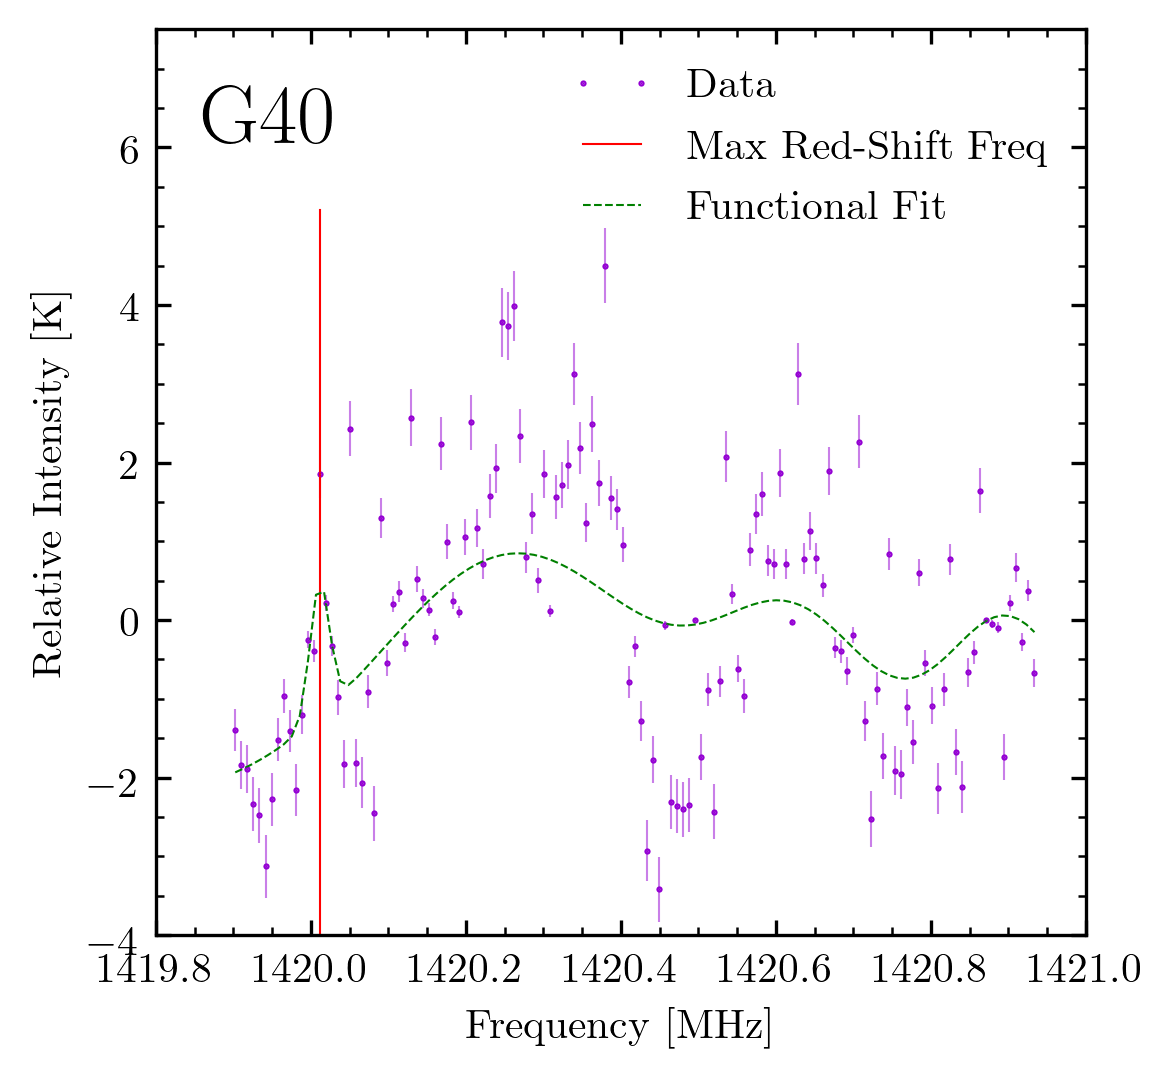

In [868]:
# G40
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-4,7.5), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins40, rel_spec40, yerr=errs_spec40, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins40, rel_spec40, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# the max redshifted frequency
ax.axvline(fred40, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

# plot the fit
x=np.linspace(bins40[0], bins40[-1], 100)
ax.plot(x, gauss_func(x, *gopt40), ls='--', lw=0.5, color='green', label='Functional Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G40')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec40_gauss_fit.png')

In [542]:
gopt50, gcov50 = gauss_fit(bins=bins50, freqs=rel_spec50, errs=errs_spec50, 
                           a1=6.5, mu1=1420.2, sig1=0.2, a2=4, mu2=1420.6, sig2=0.1, 
                           a3=5, mu3=1419.9, sig3=0.1, a4=6, mu4=1420.4, sig4=0.1, b=-2)

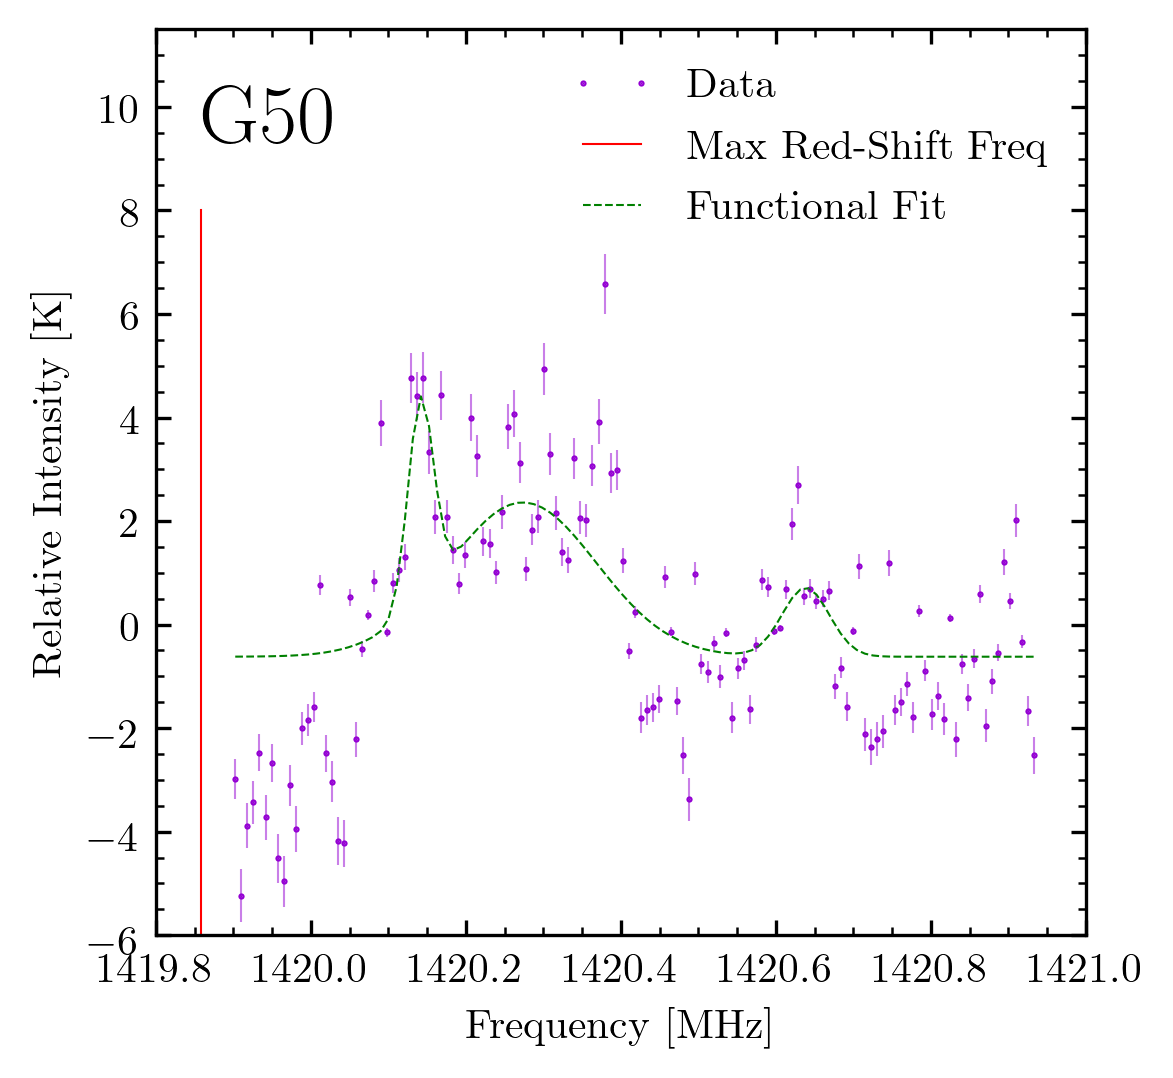

In [867]:
# G50
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-6,11.5), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins50, rel_spec50, yerr=errs_spec50, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins50, rel_spec50, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# the max redshifted frequency
ax.axvline(fred50, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

# plot the fit
x=np.linspace(bins50[0], bins50[-1], 100)
ax.plot(x, gauss_func(x, *gopt50), ls='--', lw=0.5, color='green', label='Functional Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G50')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec50_gauss_fit.png')

In [544]:
gopt50

array([ 3.88197339e+00,  1.42014168e+03,  1.64798834e-02,  1.32960070e+00,
        1.42063859e+03,  3.05896193e-02,  4.02996685e+00,  1.41985822e+03,
       -2.65771804e-03,  2.98025318e+00,  1.42027359e+03,  9.51944464e-02,
       -6.20035956e-01])

In [495]:
gopt60, gcov60 = gauss_fit(bins=bins60, freqs=rel_spec60, errs=errs_spec60, 
                           a1=5, mu1=1420.2, sig1=0.2, a2=2, mu2=1420.0, sig2=0.1, 
                           a3=6, mu3=1420.1, sig3=0.1, a4=3, mu4=1420.6, sig4=0.2, b=-2)

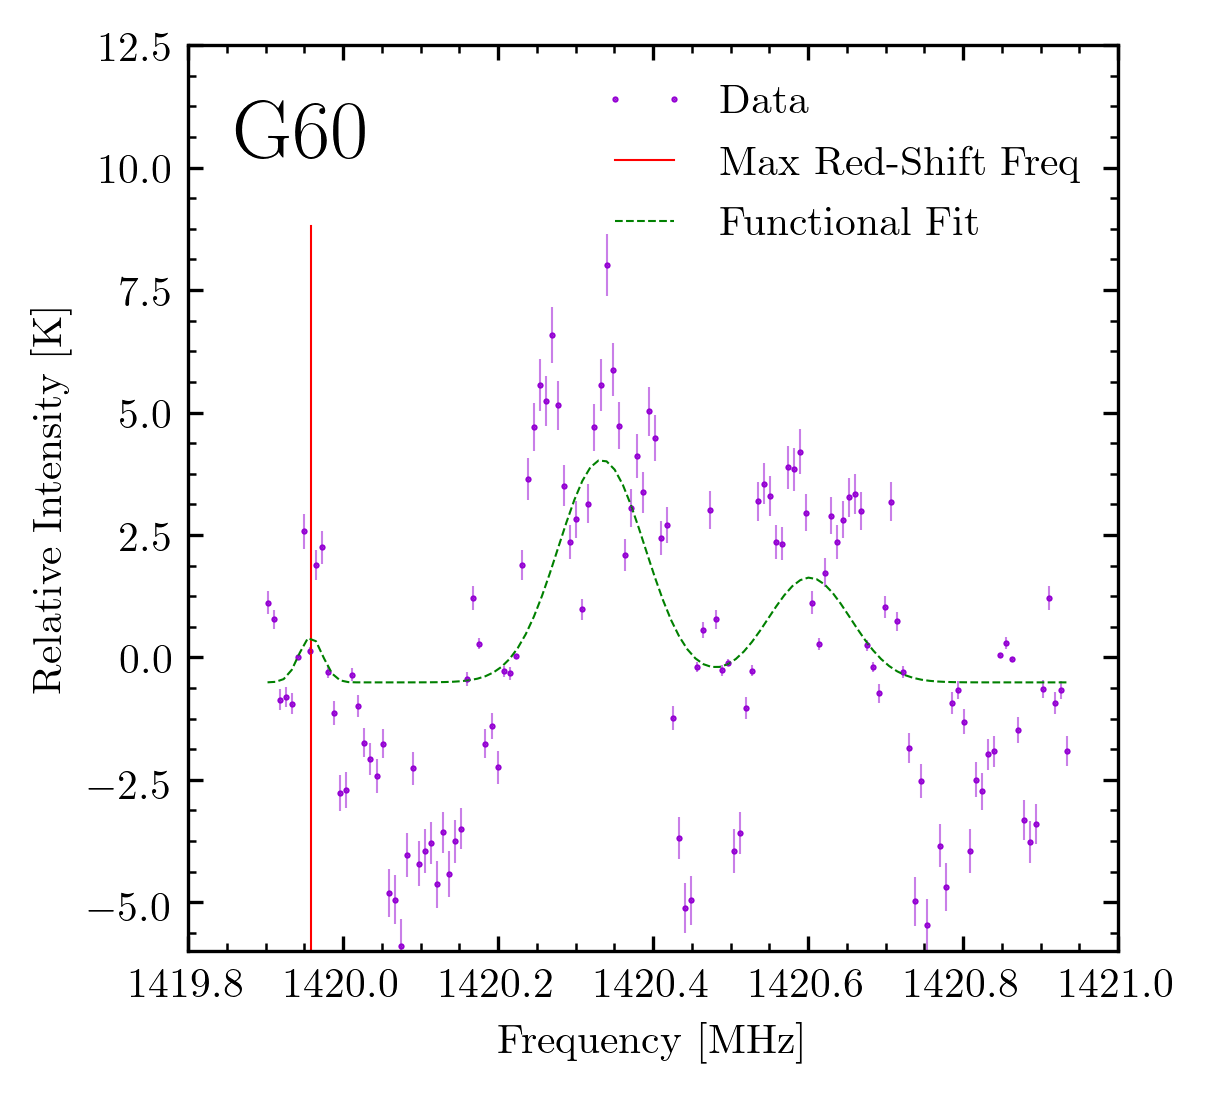

In [866]:
# G60
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-6,12.5), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins60, rel_spec60, yerr=errs_spec60, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins60, rel_spec60, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# the max redshifted frequency
ax.axvline(fred60, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

# plot the fit
x=np.linspace(bins60[0], bins60[-1], 100)
ax.plot(x, gauss_func(x, *gopt60), ls='--', lw=0.5, color='green', label='Functional Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G60')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec60_gauss_fit.png')

In [517]:
gopt70, gcov70 = gauss_fit(bins=bins70, freqs=rel_spec70, errs=errs_spec70, 
                           a1=10, mu1=1420.4, sig1=0.2, a2=2.5, mu2=1420.2, sig2=0.1, 
                           a3=3.5, mu3=1420.1, sig3=0.1, a4=5, mu4=1420.6, sig4=0.1, b=-3)

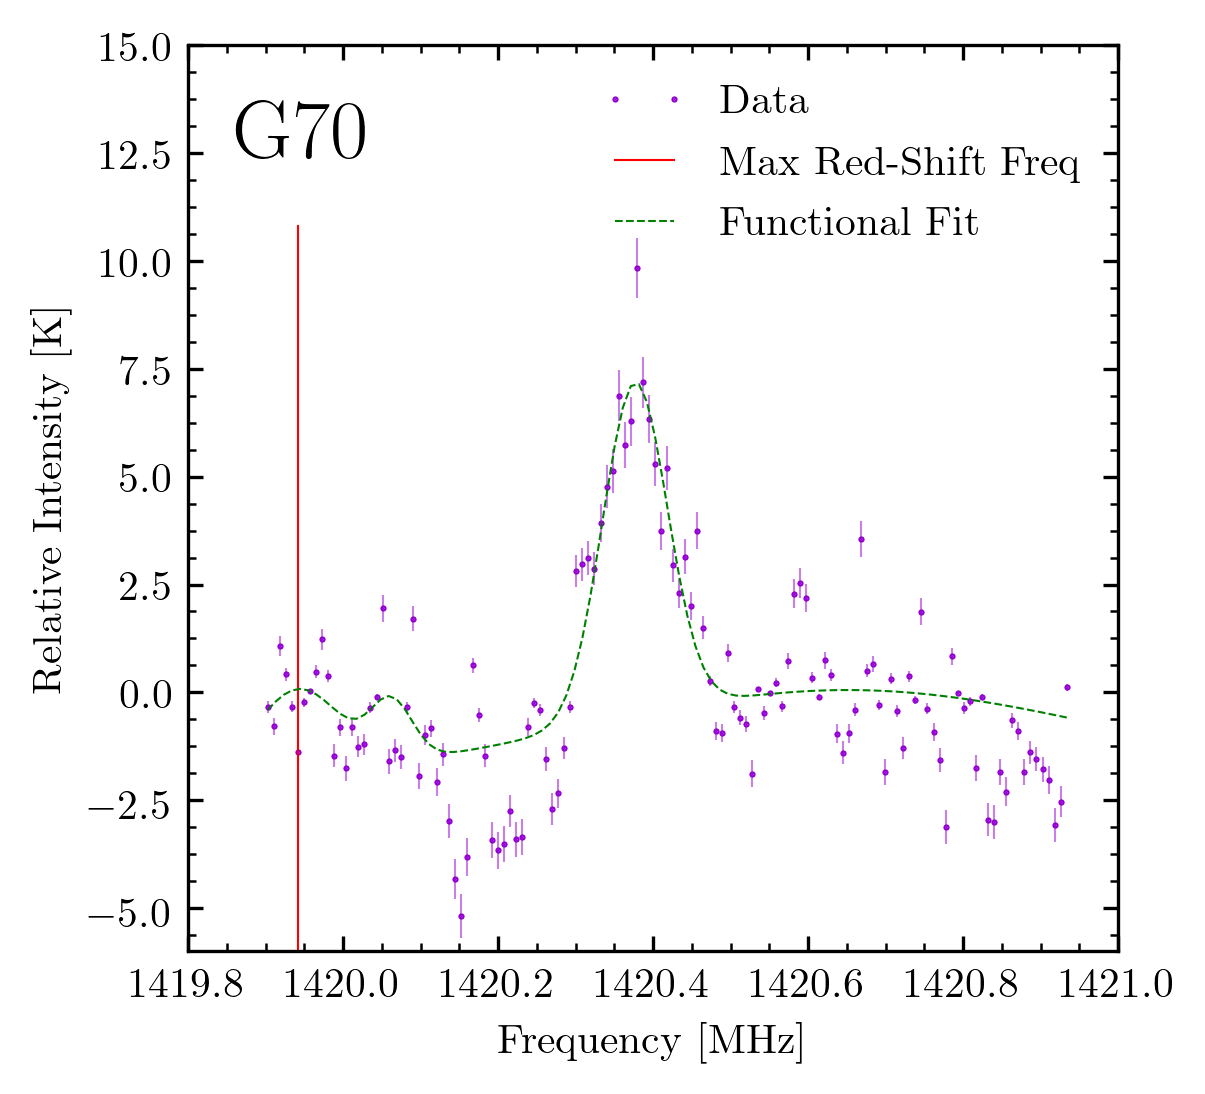

In [865]:
# G70
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-6,15), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins70, rel_spec70, yerr=errs_spec70, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins70, rel_spec70, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# the max redshifted frequency
ax.axvline(fred70, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

# plot the fit
x=np.linspace(bins70[0], bins70[-1], 100)
ax.plot(x, gauss_func(x, *gopt70), ls='--', lw=0.5, color='green', label='Functional Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G70')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec70_gauss_fit.png')

In [519]:
gopt70

array([ 7.73463629e+00,  1.42037660e+03,  4.17932338e-02,  1.34998113e+00,
        1.42006237e+03,  2.72276242e-02,  1.93175365e+00,  1.41994217e+03,
        5.52981225e-02,  2.14103564e+00,  1.42065091e+03,  3.36631502e-01,
       -2.08687311e+00])

In [500]:
gopt80, gcov80 = gauss_fit(bins=bins80, freqs=rel_spec80, errs=errs_spec80, 
                           a1=10, mu1=1420.4, sig1=0.2, a2=2.5, mu2=1420.0, sig2=0.1, 
                           a3=3.5, mu3=1420.1, sig3=0.1, a4=3, mu4=1420.6, sig4=0.1, b=-2)

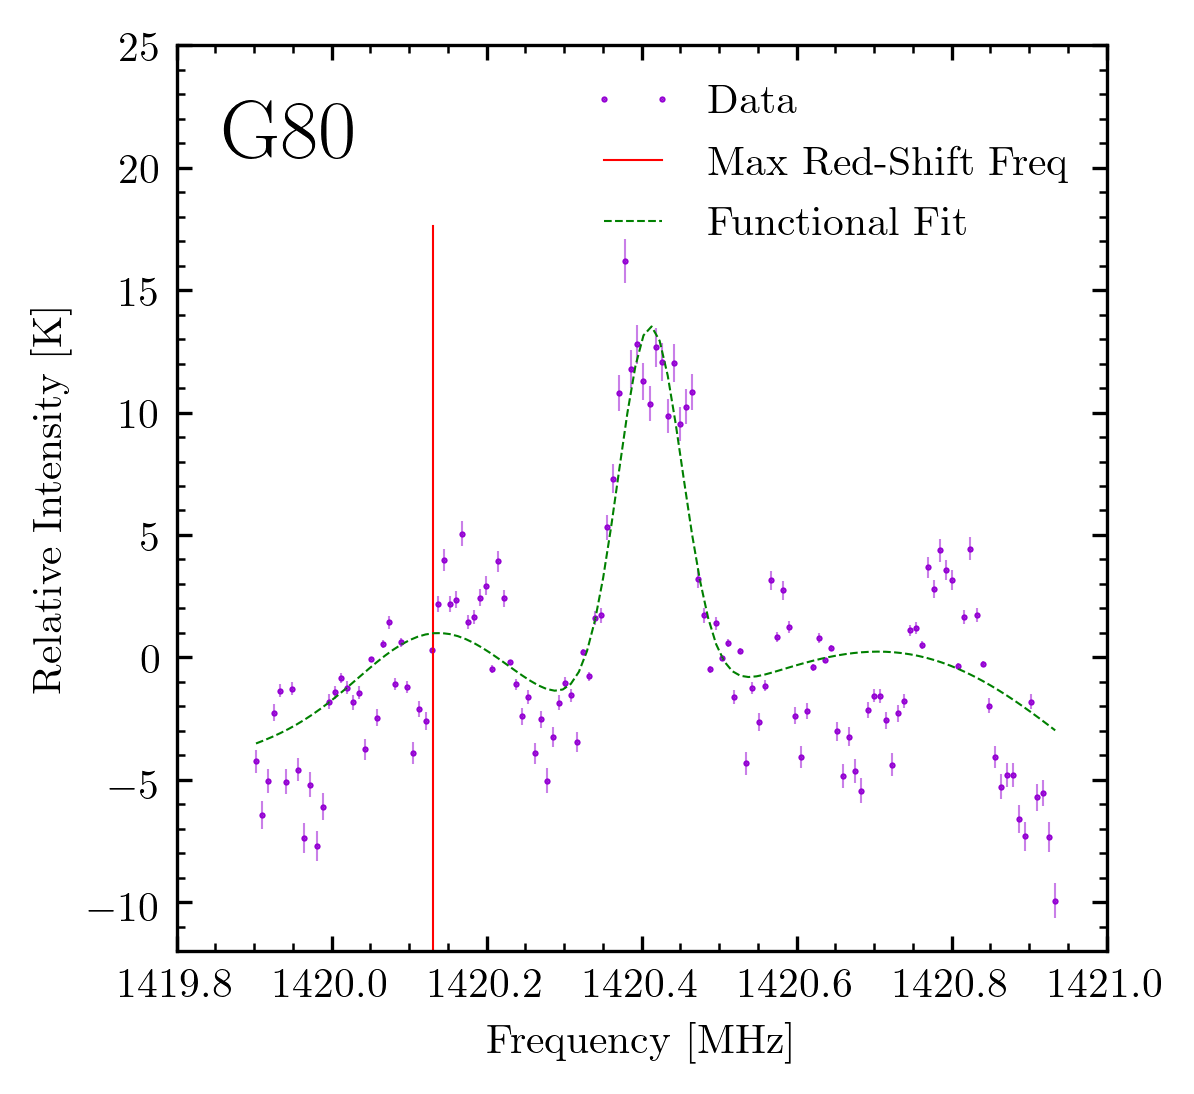

In [864]:
# G80
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-12,25), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins80, rel_spec80, yerr=errs_spec80, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins80, rel_spec80, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# the max redshifted frequency
ax.axvline(fred80, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

# plot the fit
x=np.linspace(bins80[0], bins80[-1], 100)
ax.plot(x, gauss_func(x, *gopt80), ls='--', lw=0.5, color='green', label='Functional Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G80')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec80_gauss_fit.png')

In [502]:
gopt90, gcov90 = gauss_fit(bins=bins90, freqs=rel_spec90, errs=errs_spec90, 
                           a1=20, mu1=1420.4, sig1=0.4, a2=2.5, mu2=1420.0, sig2=0.1, 
                           a3=5, mu3=1420.1, sig3=0.1, a4=5, mu4=1420.6, sig4=0.1, b=-4)

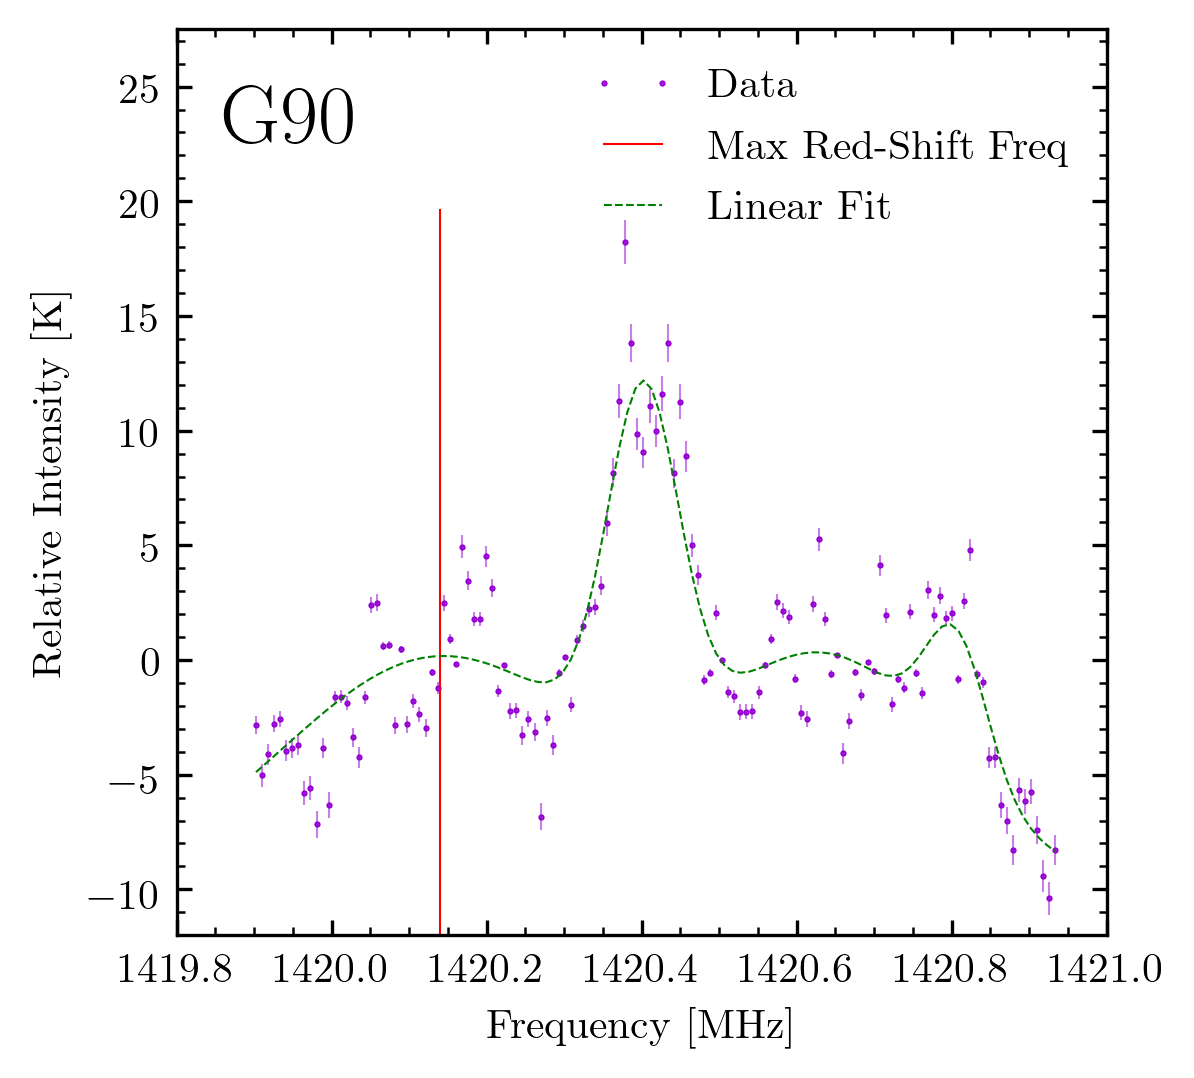

In [863]:
# G90
fig, [ax] = modplot.axes(ratio_plot = False, xlim=(1419.8, 1421.0), ylim=(-12,27.5), 
                         xlabel='Frequency [MHz]', ylabel='Relative Intensity [K]')

ax.errorbar(bins80, rel_spec90, yerr=errs_spec90, ls='none', marker='.', ms=0.5,
            elinewidth=0.5, capsize=0, capthick=1, color='darkviolet', alpha=0.5)
ax.plot(bins90, rel_spec90, ls='None', marker='o', ms=0.5, color='darkviolet', label='Data')

# the max redshifted frequency
ax.axvline(fred90, ymin=0, ymax=0.8, ls='-', lw=0.5, color='red', label='Max Red-Shift Freq')

# plot the fit
x=np.linspace(bins90[0], bins90[-1], 100)
ax.plot(x, gauss_func(x, *gopt90), ls='--', lw=0.5, color='green', label='Linear Fit')

modplot.stamp(ax=ax, left_x=0.05, top_y=0.90, textops_update={'fontsize':20},
             line_0 = 'G90')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\spec90_gauss_fit.png')

Get the Maximally Shifted Red-Shifted Frequency from Each Scan

In [545]:
# get the fit mean parameters from each gaussian in each longitude
means20 = gopt20[1:][::3]
means30 = gopt30[1:][::3]
means40 = gopt40[1:][::3]
means50 = gopt50[1:][::3]
means60 = gopt60[1:][::3]
means70 = gopt70[1:][::3]
means80 = gopt80[1:][::3]
means90 = gopt90[1:][::3]

In [546]:
# for now, take the gaussian with smallest mean (fit frequency) to be the max red shifted freq
fred20 = min(means20)
uncert20 = np.sqrt(np.diag(gcov20)[gopt20==fred20])

fred30 = min(means30)
uncert30 = np.sqrt(np.diag(gcov30)[gopt30==fred30])

fred40 = min(means40)
uncert40 = np.sqrt(np.diag(gcov40)[gopt40==fred40])

fred50 = min(means50)
uncert50 = np.sqrt(np.diag(gcov50)[gopt50==fred50])

fred60 = min(means60)
uncert60 = np.sqrt(np.diag(gcov60)[gopt60==fred60])

fred70 = min(means70)
uncert70 = np.sqrt(np.diag(gcov70)[gopt70==fred70])

fred80 = min(means80)
uncert80 = np.sqrt(np.diag(gcov80)[gopt80==fred80])

fred90 = min(means90)
uncert90 = np.sqrt(np.diag(gcov90)[gopt90==fred90])

In [675]:
uncert80[0]

0.26701735320523107

In [677]:
# collect the max shifted frequencies and errors in 2 separate lists
freds = [fred20, fred30, fred40, fred50, fred60, fred70, fred80, fred90]
frederrs = [uncert20[0], uncert30[0], uncert40[0], uncert50[0], uncert60[0], 
            uncert70[0], uncert80[0], uncert90[0]]

**Derive the Velocity Curve of the Milky Way**

Create Functions for Relevant Quantities

$r = R_{\odot}\sin(\frac{\alpha\pi}{180})$

In [692]:
# radius (in kiloparsecs)
def radius(longitudes):
    # distance from solar system to galactic center  (kiloparsecs)
    R0 = 8.5
    
    # uncertainty
    dR0 = 0.5
    
    rad = R0*np.sin(np.array(longitudes)*np.pi/180)
    return rad, rad*dR0/R0

$v_{\mathrm{max}}=c\frac{f_{0}-f_{\mathrm{red}}}{f_{0}}-v_{\mathrm{LSR}}$

In [691]:
# maximum radial velocity along our line of site
def vmax(freqs, funcerts, vlsrs):
    # speed of light (in km/s)
    c = 299792.458
    
    # 21cm line frequency (MHz)
    f0 = 1420.4
    
    # doppler effect
    dop = (f0-np.array(freqs))/f0
    
    shift = c*dop-vlsrs
    dshift = shift*np.array(funcerts)/np.array(freqs)
    return shift, dshift 

$v(r)=v_{\mathrm{max}} + v_{\odot}\sin(\frac{\alpha\pi}{180})$

In [707]:
# galactic velocity
def gal_vel(vmaxes, vmaxerrs, longitudes):
    
    # rotational velocity of the solar system
    v0 = 220 #km/sec
    
    # uncertainty in solar system rot velocity
    dv0 = 20
    
    # galactic coordinate angles
    angs = np.sin(np.array(longitudes)*np.pi/180)
    
    
    vels = np.array(vmaxes) + v0*angs
    dvels = vels*(np.array(vmaxerrs)/np.array(vmaxes) + dv0/v0)
    
    return vels, dvels

Calculate the Galactic Velocities

In [708]:
# get the radii (will be the x axis of velocity curve, in kpc)
radii, raduncerts = radius(longs1)

In [709]:
radii, raduncerts

(array([2.90717122, 4.25      , 5.46369468, 6.51137777, 7.36121593,
        7.98738728, 8.3708659 , 8.5       ]),
 array([0.17101007, 0.25      , 0.3213938 , 0.38302222, 0.4330127 ,
        0.46984631, 0.49240388, 0.5       ]))

In [710]:
# get the vmaxes
vmaxes, vmaxerrs = vmax(freds, frederrs, vlsrs1)

In [711]:
vmaxes, vmaxerrs

(array([ 84.35542636,  77.66570942,  79.01333881, 111.97898125,
         91.64661802,  95.81067016,  56.69198778,  54.80727562]),
 array([1.49283310e-02, 5.47098500e-01, 4.47237675e-05, 4.48536569e-17,
        1.01939183e-04, 2.89445131e-04, 1.06593985e-02, 1.62598065e-04]))

In [712]:
# get the galactic velocities
vels, velerrs = gal_vel(vmaxes, vmaxerrs, longs1)

In [714]:
vels, velerrs

(array([159.59985789, 187.66570942, 220.42661295, 280.50875873,
        282.17220685, 302.54304673, 273.34969344, 274.80727562]),
 array([14.53732228, 18.38248762, 20.03890776, 25.50079625, 25.65233267,
        27.50482733, 24.90136817, 24.98329488]))

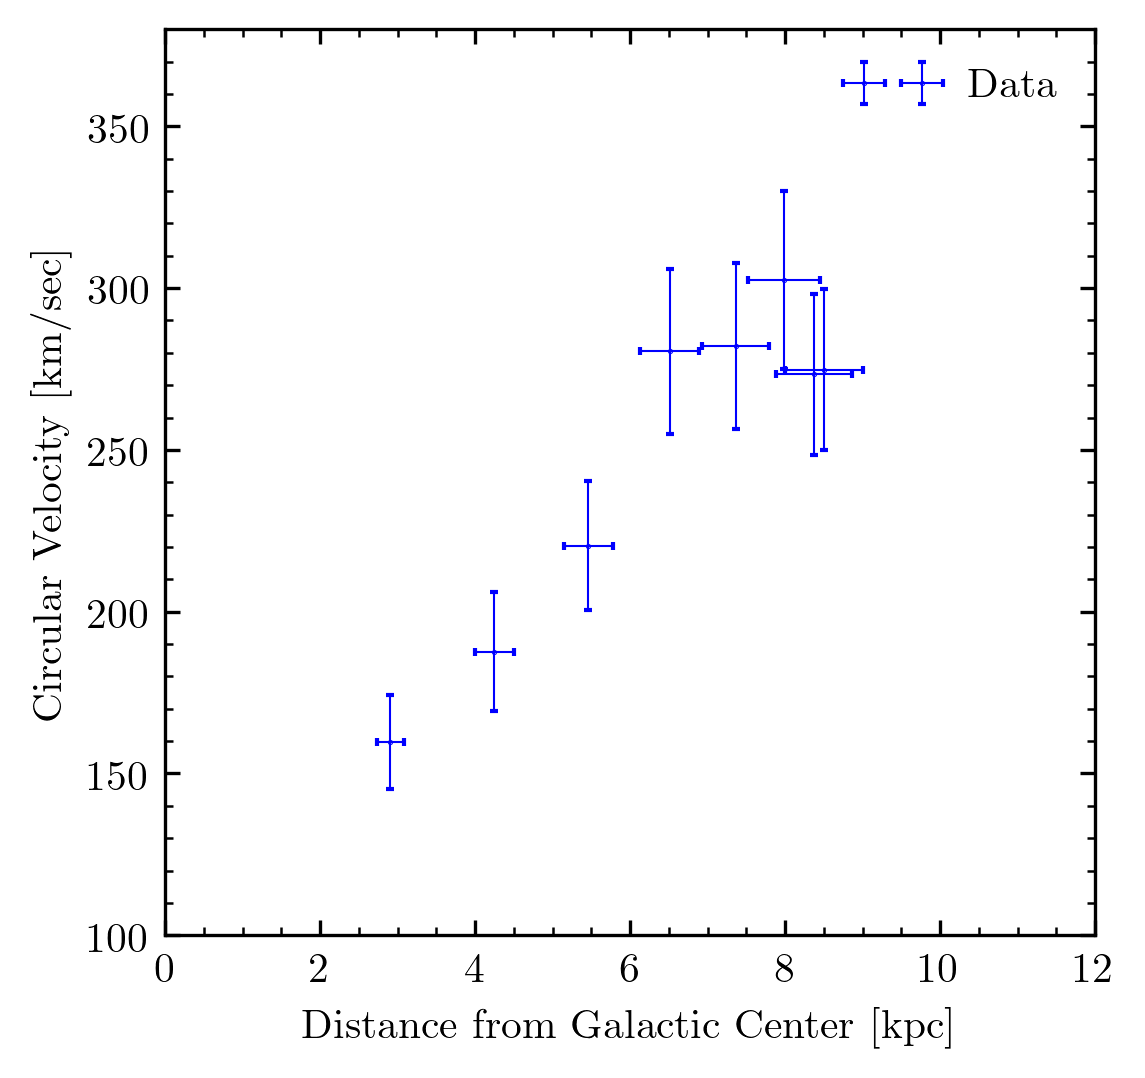

In [851]:
# plot the velocity curve
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,12), ylim=(100,380), 
                         xlabel='Distance from Galactic Center [kpc]', 
                         ylabel='Circular Velocity [km/sec]')

ax.errorbar(radii, vels, xerr=raduncerts, yerr=velerrs, capthick=1, capsize=1, elinewidth=0.5, 
            color='blue', marker='.', ms=0.5, ls='none', label='Data')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\raw_rot_curve.png')

Display Theoretical Models of Rotation Curves

In [793]:
# solid body rotation
def solid_body(r):
    return r

# keplerian prediction
def keplerian(r):
    return r**-0.5 + 4

In [794]:
rs = np.linspace(0.00001,20,100)

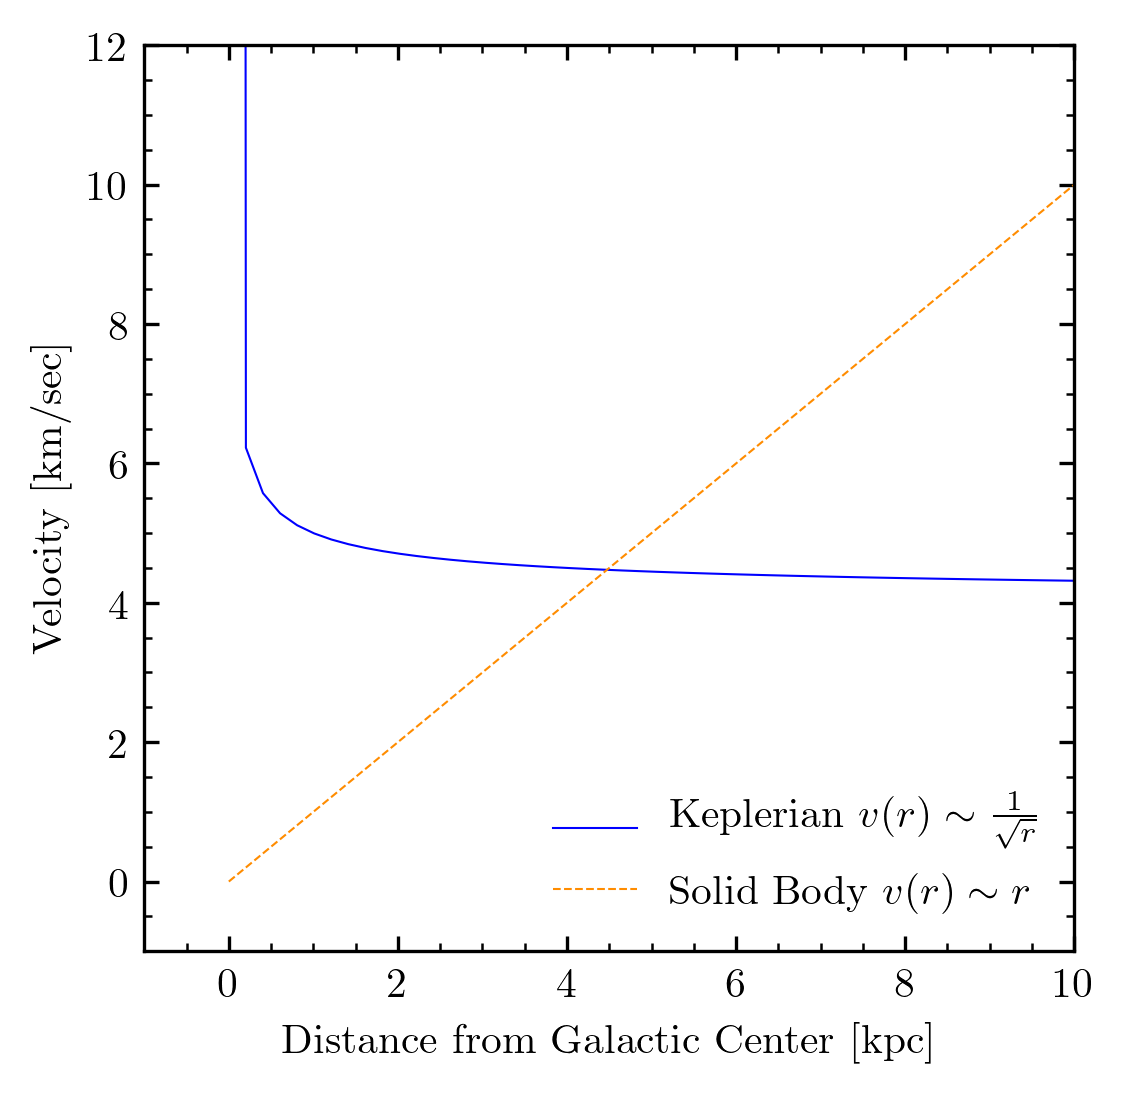

In [850]:
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(-1,10), ylim=(-1,12),
                         xlabel='Distance from Galactic Center [kpc]', 
                         ylabel='Velocity [km/sec]')

ax.plot(rs, keplerian(rs), color='blue', ls='-', lw=0.5, 
        label=r'Keplerian $v(r) \sim \frac{1}{\sqrt{r}}$')
ax.plot(rs, solid_body(rs), color='darkorange', ls='--', lw=0.5, 
        label=r'Solid Body $v(r) \sim r$')

ax.legend(loc='Upper Right', numpoints=1, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\theo_rot_curves.png')

Fit the Data above 6kpc to both the keplerian and linear dark matter model

In [744]:
## Note: The bulge has a radius of about 6 kilo parsecs

In [765]:
def keplerian_func(r, g, m):
    return np.sqrt(g*m*np.ones(shape=np.array(r).shape)/np.array(r))

In [766]:
# kep fit function
def kep_fit(r, v, errs, g, m):
    popt, pcov = curve_fit(keplerian_func, r, v, sigma=errs, p0 = [g, m],
                       absolute_sigma = True)
    return popt, pcov

In [807]:
def darkmatter(r, a, b):
    return a*r+b

In [813]:
# dark fit function
def dark_fit(r, v, errs, a, b):
    popt, pcov = curve_fit(darkmatter, r, v, sigma=errs, p0 = [a, b],
                       absolute_sigma = True)
    return popt, pcov

In [814]:
popt_kep, pcov_kep = kep_fit(radii[3:], vels[3:], velerrs[3:], 4.3*10**-6, 2*10)

In [815]:
popt_kep

array([4.53802966e-01, 1.34193857e+06])

In [816]:
popt_dark, pcov_dark = dark_fit(radii[3:], vels[3:], velerrs[3:], 250.0, 12.0)

In [817]:
popt_dark

array([ -1.93928879, 296.98869257])

Get the Chi Squared Statistic For Each Fit

In [827]:
chi_kep = chisq(keplerian_func, popt_kep, radii[3:], vels[3:], velerrs[3:])
chi_dark = chisq(darkmatter, popt_dark, radii[3:], vels[3:], velerrs[3:])

In [836]:
chi_kep

2.0561037430032267

In [837]:
chi_dark

0.749109759862233

Plot the Data with the Fit Models

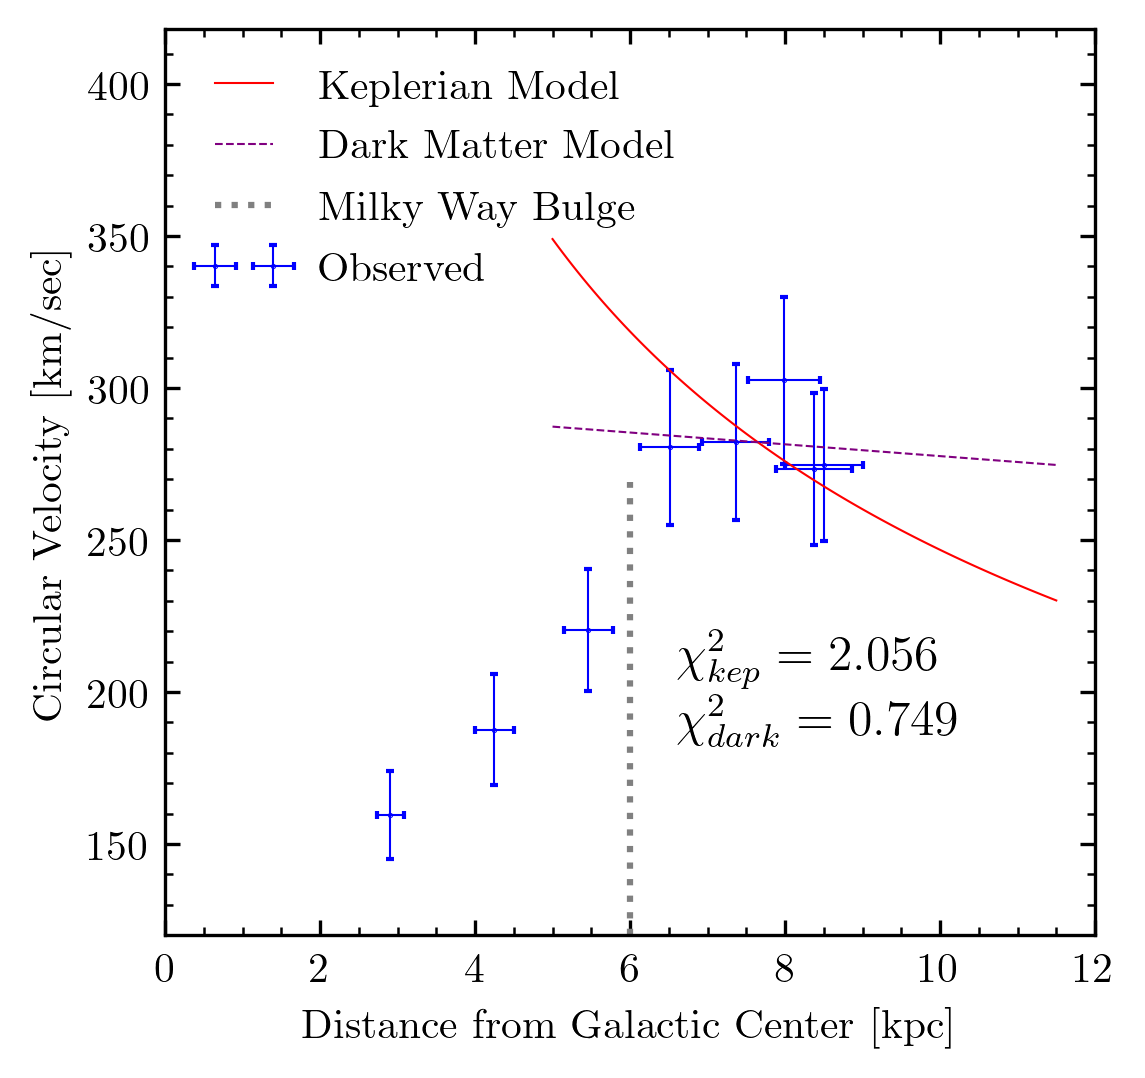

In [874]:
# plot the velocity curve
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(0,12), ylim=(120,418), 
                         xlabel='Distance from Galactic Center [kpc]', 
                         ylabel='Circular Velocity [km/sec]')

# observed data
ax.errorbar(radii, vels, xerr=raduncerts, yerr=velerrs, capthick=1, capsize=1, elinewidth=0.5, 
            color='blue', marker='.', ms=0.5, ls='none', label='Observed')

x = np.linspace(5, 11.5, 100)
# fit models
ax.plot(x, keplerian_func(x, *popt_kep), ls='-', lw='0.5',
        color='red', label='Keplerian Model')
ax.plot(x, darkmatter(x, *popt_dark), ls='--', lw='0.5', 
        color='purple', label='Dark Matter Model')

# milky way bulge
ax.axvline(6, ymin=0, ymax=0.5, color='gray', ls=':', label='Milky Way Bulge')

modplot.stamp(ax=ax, left_x=0.55, top_y=0.30, textops_update={'fontsize':12},
             line_0 = r'$\chi^{2}_{kep}=2.056$',
             line_1 = r'$\chi^{2}_{dark}=0.749$')

ax.legend(loc='upper left', numpoints=2, frameon=False)

save = True
if save: 
    plt.savefig(dir_plot + '\\rot_curve_fit.png')